What is Anomaly?
- In machine learning and data mining, anomaly detection is the task of identifying the rare items, events or observations which are suspicious and seem different from the majority of the data. These anomalies can indicate some kind of problems such as bank fraud, medical problems, failure of industrial equipment, etc. The anomaly detection has two major categories, the unsupervised anomaly detection where anomalies are detected in an unlabeled data and the supervised anomaly detection where anomalies are detected in the labelled data.  

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

## 1. Data

In [2]:
df = pd.read_csv('sensor.csv')

In [3]:
df.shape

(220320, 54)

In [4]:
df.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  4/1/2018 0:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  4/1/2018 0:01   2.465394   47.09201    53.2118  46.310760   634.3750   
2  4/1/2018 0:02   2.444734   47.35243    53.2118  46.397570   638.8889   
3  4/1/2018 0:03   2.460474   47.09201    53.1684  46.397568   628.1250   
4  4/1/2018 0:04   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 54 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [6]:
df.describe()

sensor_00      sensor_01      sensor_02      sensor_03  \
count  210112.000000  219951.000000  220301.000000  220301.000000   
mean        2.372221      47.591611      50.867392      43.752481   
std         0.412227       3.296666       3.666820       2.418887   
min         0.000000       0.000000      33.159720      31.640620   
25%         2.438831      46.310760      50.390620      42.838539   
50%         2.456539      48.133678      51.649300      44.227428   
75%         2.499826      49.479160      52.777770      45.312500   
max         2.549016      56.727430      56.032990      48.220490   

           sensor_04      sensor_05      sensor_06      sensor_07  \
count  220301.000000  220301.000000  215522.000000  214869.000000   
mean      590.673936      73.396414      13.501537      15.843152   
std       144.023912      17.298247       2.163736       2.201155   
min         2.798032       0.000000       0.014468       0.000000   
25%       626.620400      69.976260      13.346350      15.907120   
50%       632.638916      75.576790      13.642940      16.167530   
75%       637.615723      80.912150      14.539930      16.427950   
max       800.000000      99.999880      22.251160      23.596640   

           sensor_08      sensor_09  ...      sensor_42      sensor_43  \
count  215213.000000  215725.000000  ...  220293.000000  220293.000000   
mean       15.200721      14.799210  ...      35.453455      43.879591   
std         2.037390       2.091963  ...      10.259521      11.044404   
min         0.028935       0.000000  ...      22.135416      24.479166   
25%        15.183740      15.053530  ...      32.812500      39.583330   
50%        15.494790      15.082470  ...      35.156250      42.968750   
75%        15.697340      15.118630  ...      36.979164      46.614580   
max        24.348960      25.000000  ...     374.218800     408.593700   

           sensor_44      sensor_45      sensor_46      sensor_47  \
count  220293.000000  220293.000000  220293.000000  220293.000000   
mean       42.656877      43.094984      48.018585      44.340903   
std        11.576355      12.837520      15.641284      10.442437   
min        25.752316      26.331018      26.331018      27.199070   
25%        36.747684      36.747684      40.509258      39.062500   
50%        40.509260      40.219910      44.849540      42.534720   
75%        45.138890      44.849540      51.215280      46.585650   
max      1000.000000     320.312500     370.370400     303.530100   

           sensor_48      sensor_49      sensor_50      sensor_51  
count  220293.000000  220293.000000  143303.000000  204937.000000  
mean      150.889044      57.119968     183.049260     202.699667  
std        82.244957      19.143598      65.258650     109.588607  
min        26.331018      26.620370      27.488426      27.777779  
25%        83.912030      47.743060     167.534700     179.108800  
50%       138.020800      52.662040     193.865700     197.338000  
75%       208.333300      60.763890     219.907400     216.724500  
max       561.632000     464.409700    1000.000000    1000.000000  

[8 rows x 52 columns]

## 2. PRE-PROCESS

In [8]:
# drop duplicates
df =  df.drop_duplicates()
# Entire "sensor_15" column is NaN therefore remove it from data
del df['sensor_15']

In [9]:
# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]
# Let's use above function to look at top ten columns with NaNs
calc_percent_NAs(df).head(10)

percent
sensor_50  0.349569
sensor_51  0.069821
sensor_00  0.046333
sensor_07  0.024741
sensor_08  0.023180
sensor_06  0.021777
sensor_09  0.020856
sensor_01  0.001675
sensor_30  0.001185
sensor_29  0.000327

In [10]:
#Lets fill Let's fill NAs in columns sensor_50, sensor_51, sensor_00, sensor_07, sensor_08, sensor_06 and sensor_09 with

df['sensor_50'].fillna((df['sensor_50'].mean()), inplace=True)
df['sensor_51'].fillna((df['sensor_51'].mean()), inplace=True)
df['sensor_00'].fillna((df['sensor_00'].mean()), inplace=True)
df['sensor_08'].fillna((df['sensor_08'].mean()), inplace=True)
df['sensor_07'].fillna((df['sensor_07'].mean()), inplace=True)
df['sensor_06'].fillna((df['sensor_06'].mean()), inplace=True)
df['sensor_09'].fillna((df['sensor_09'].mean()), inplace=True)

In [11]:
df_1 = df.dropna()

In [12]:
#convert datetime
df_1['Date'] = pd.to_datetime(df_1['timestamp'])
del df_1['timestamp']

df_1 = df_1.set_index('Date')
df_1.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
Date                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
Date                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
Date                 ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
Date                                                                         
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   

                     machine_status  
Date                                 
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 52 columns]

In [13]:
df = df_1.copy()

In [14]:
# df = pd.DataFrame(df)

In [15]:
column_names = df.columns
print(column_names)

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'machine_status'],
      dtype='object')


## 3. EDA

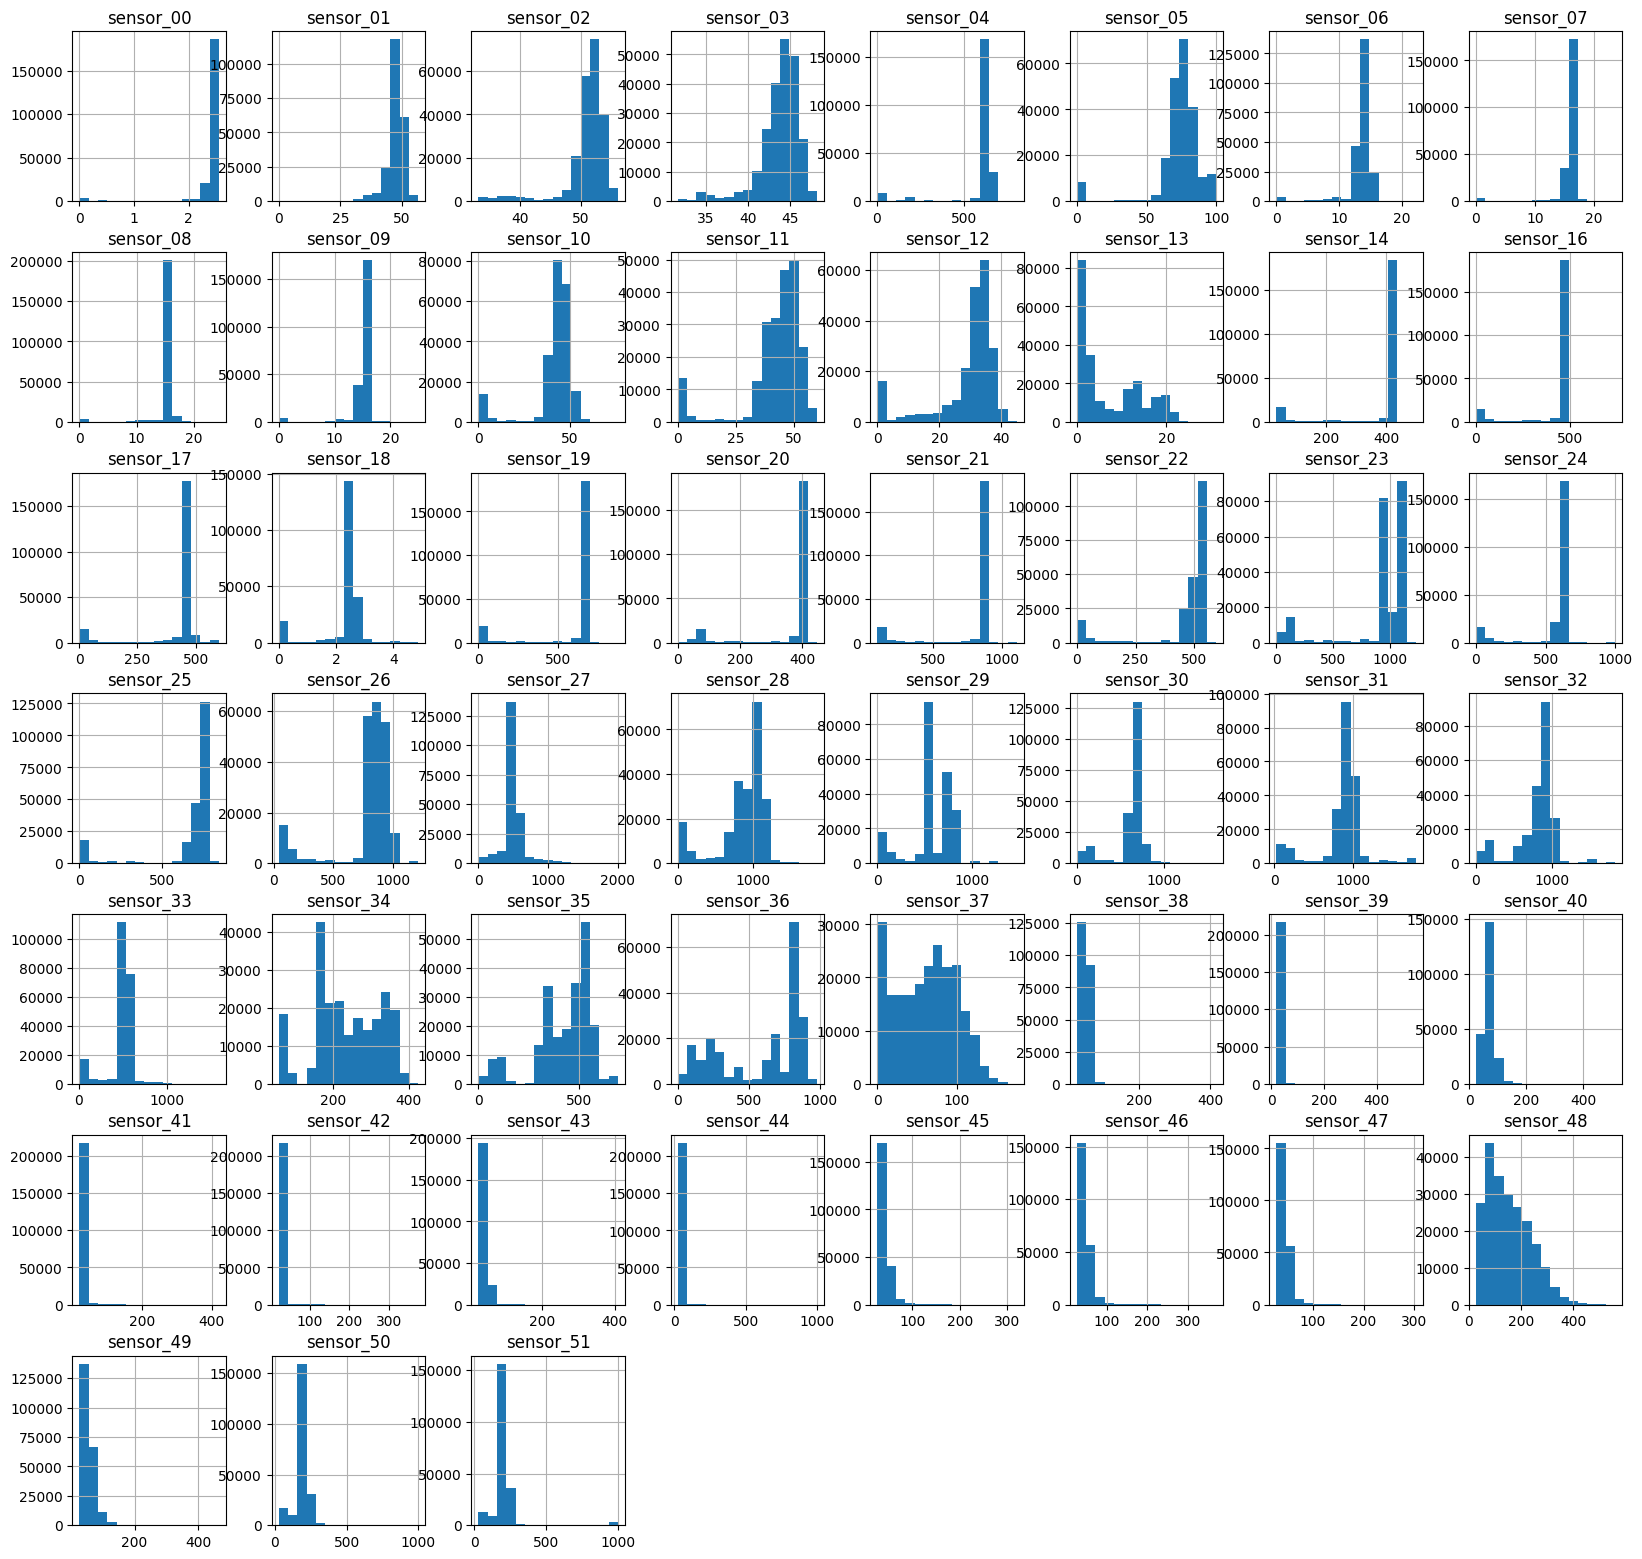

In [16]:
# Histogram
df.hist(df.columns, bins = 15, layout = (10,8), figsize = (20,28))
plt.show()

In [17]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

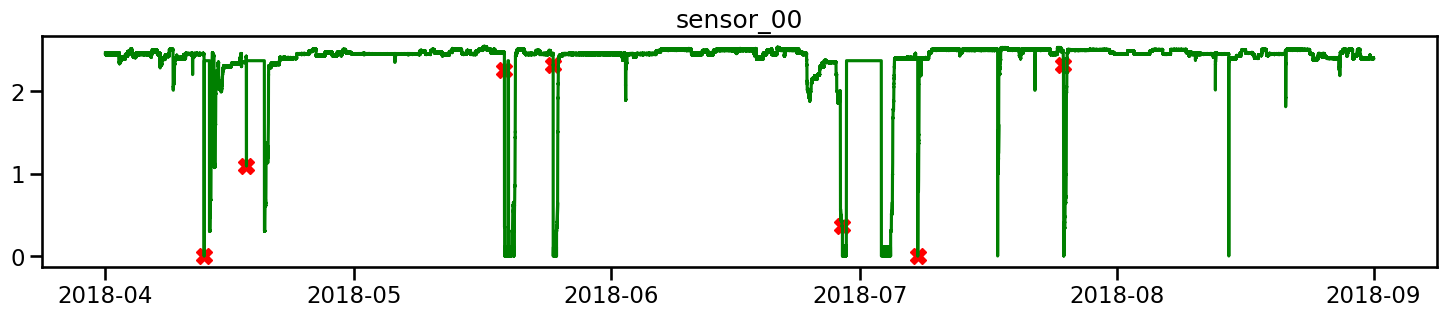

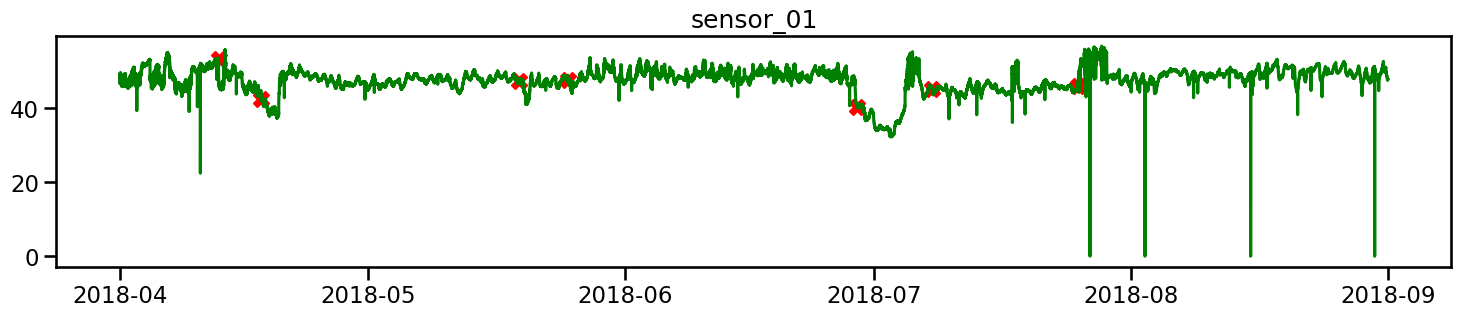

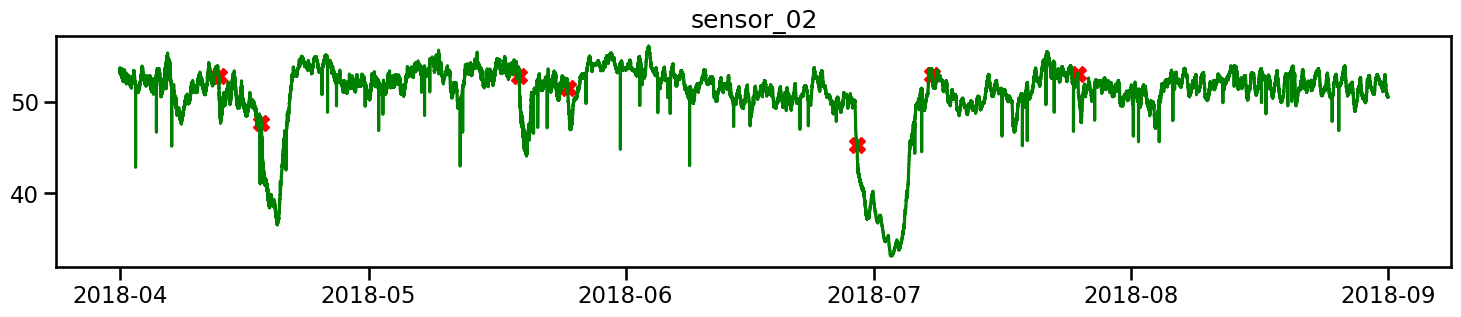

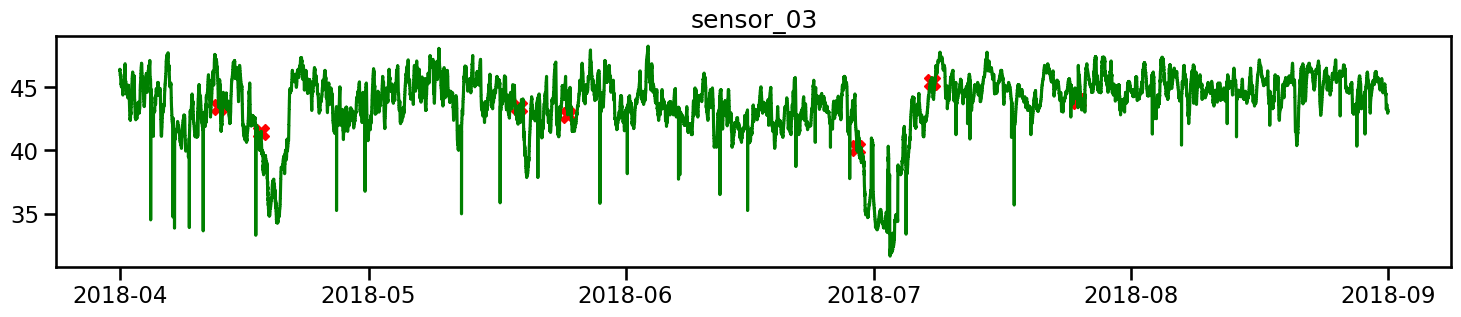

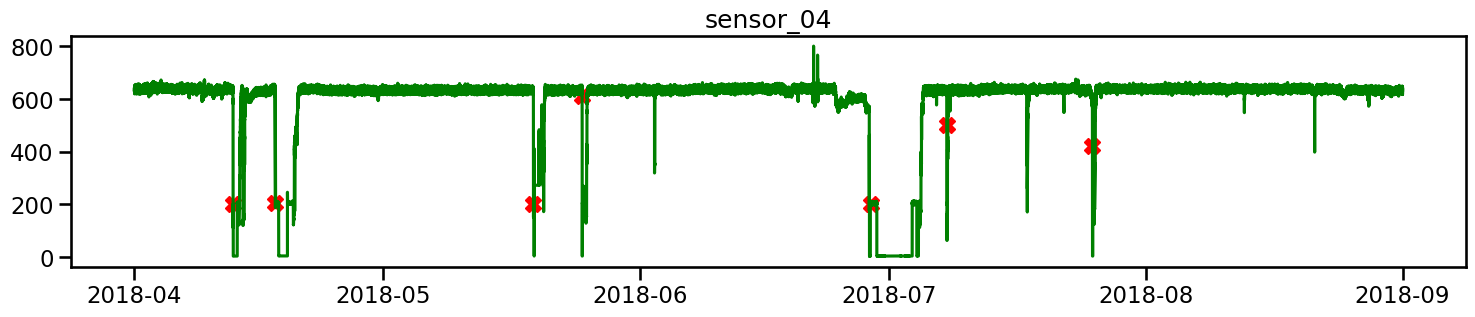

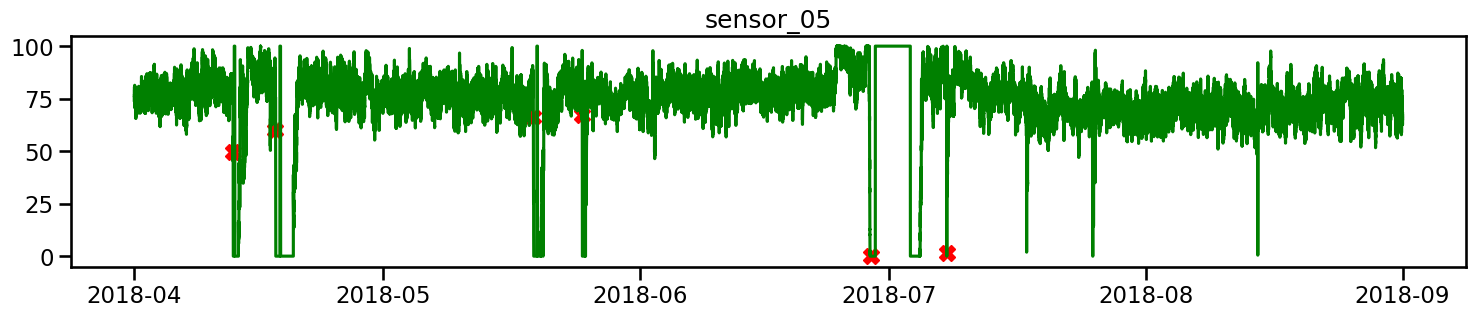

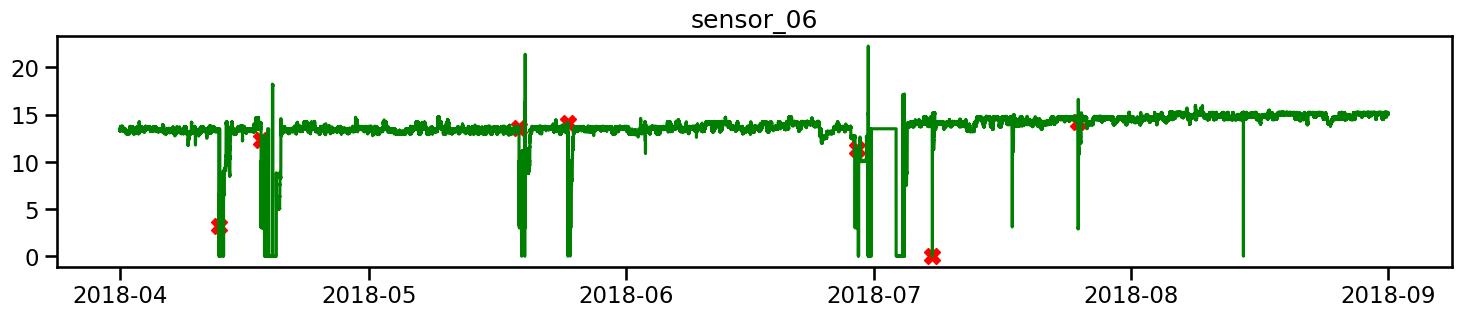

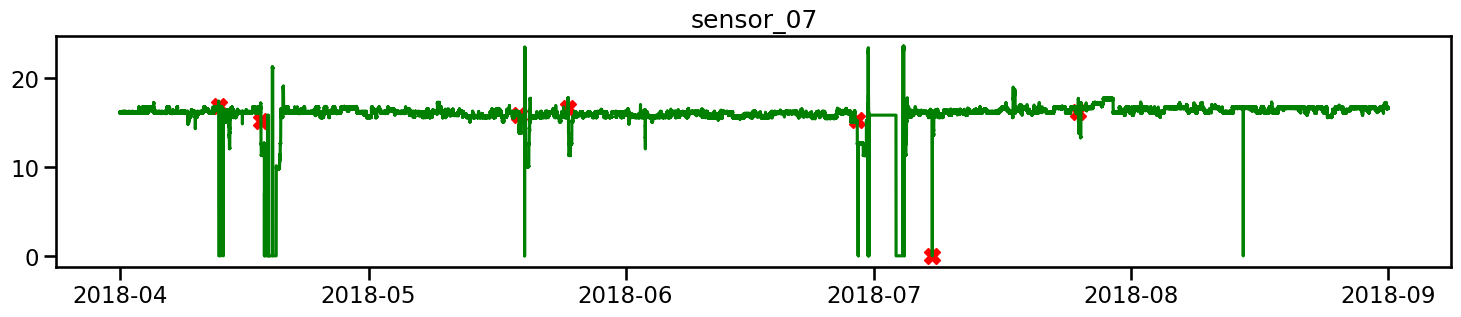

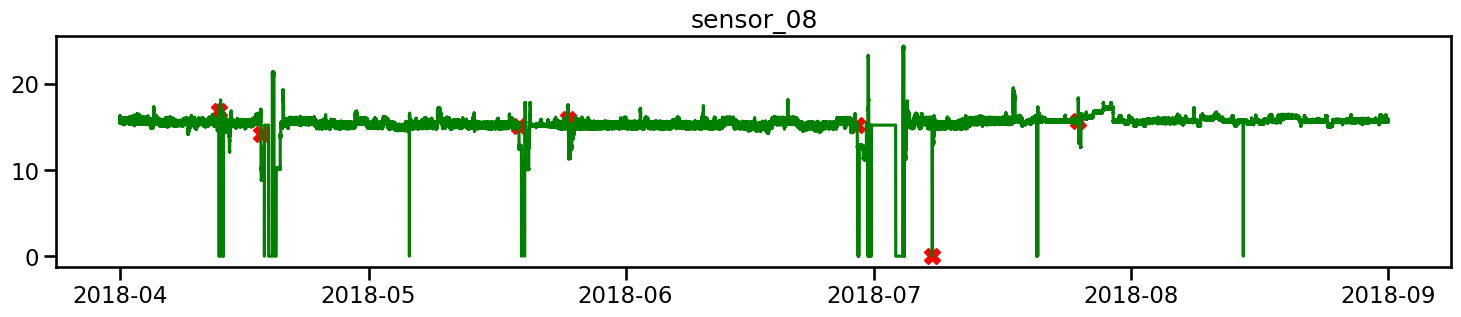

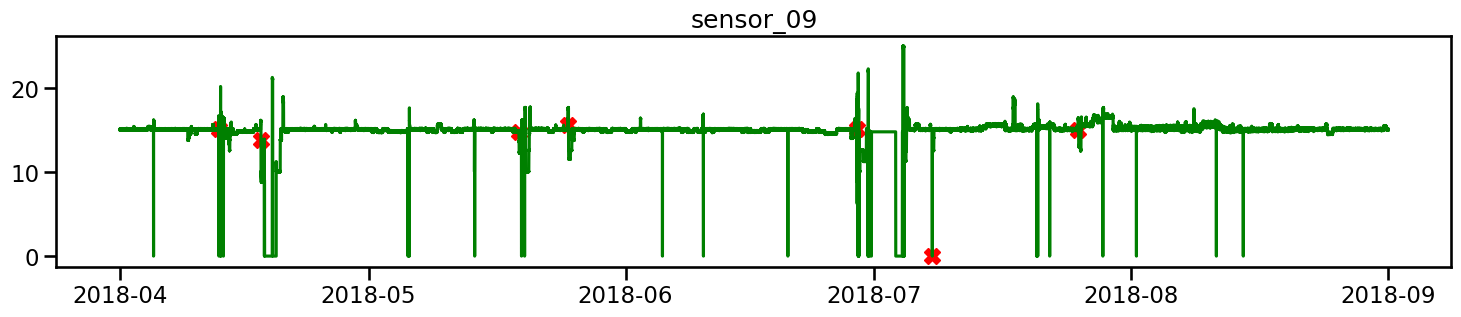

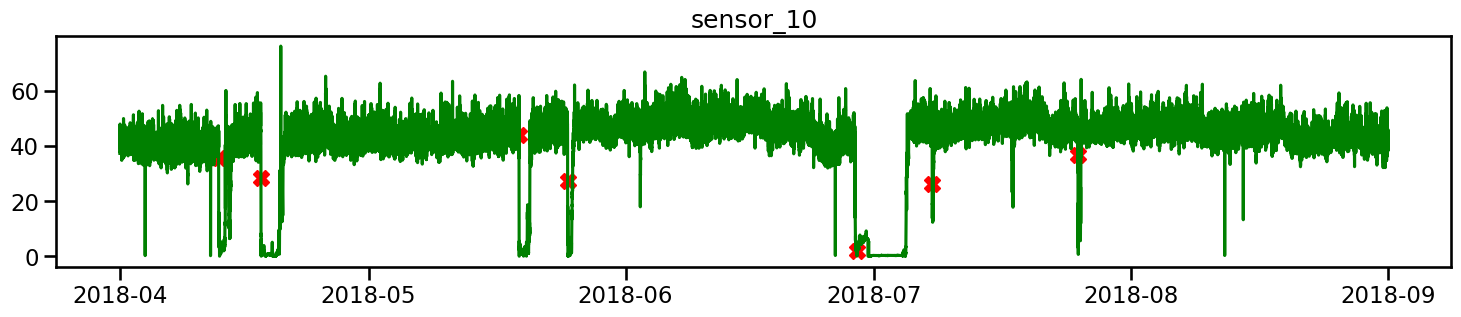

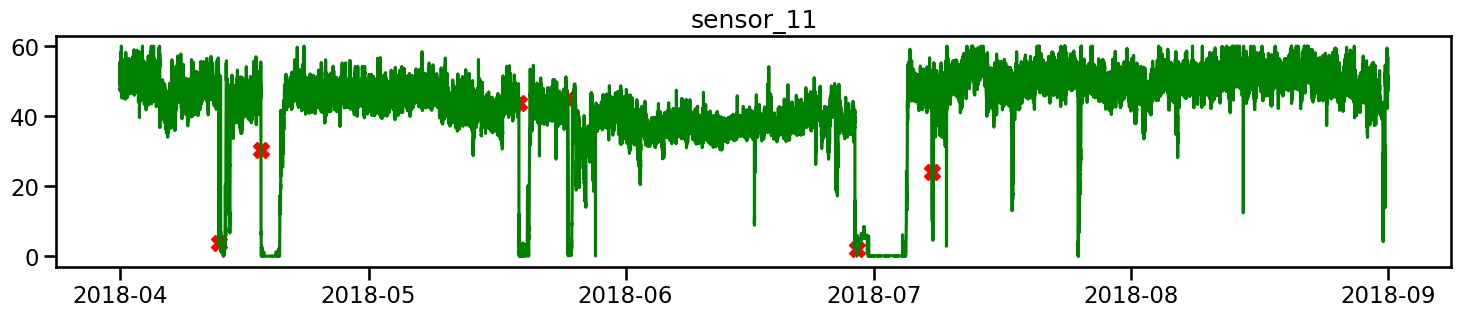

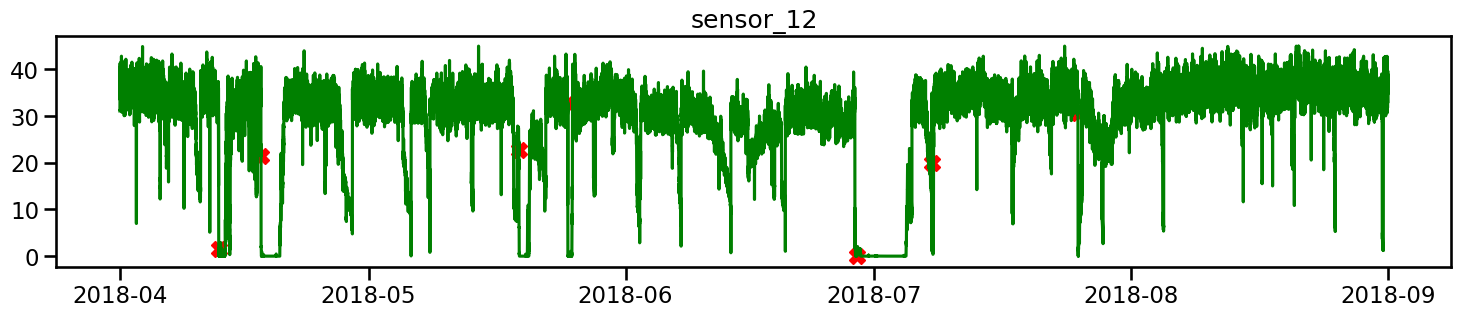

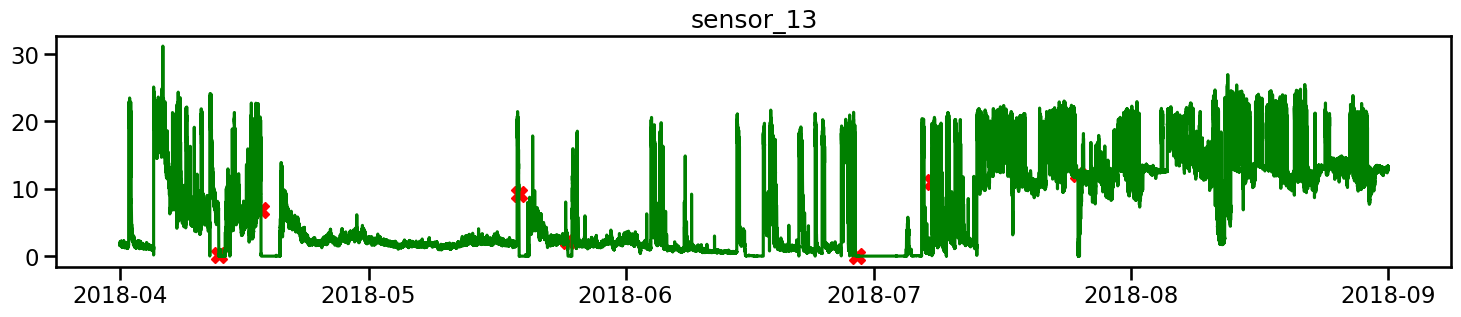

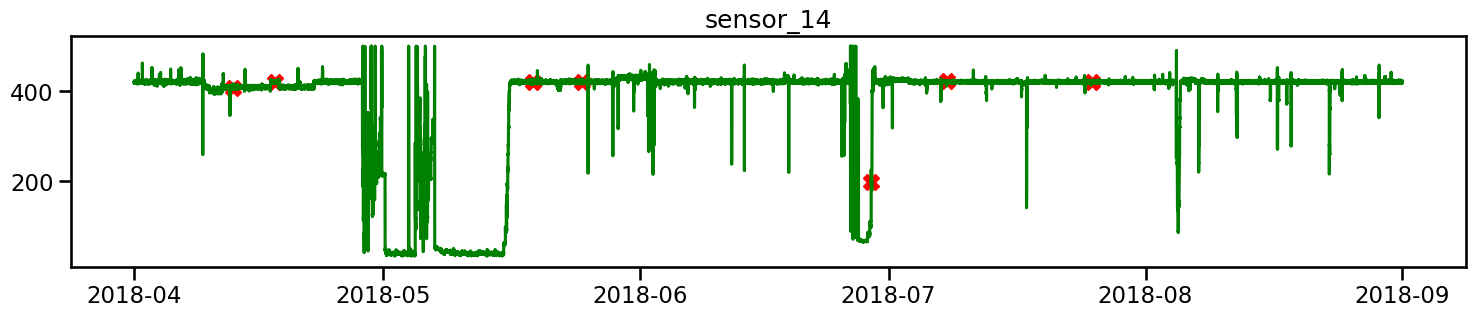

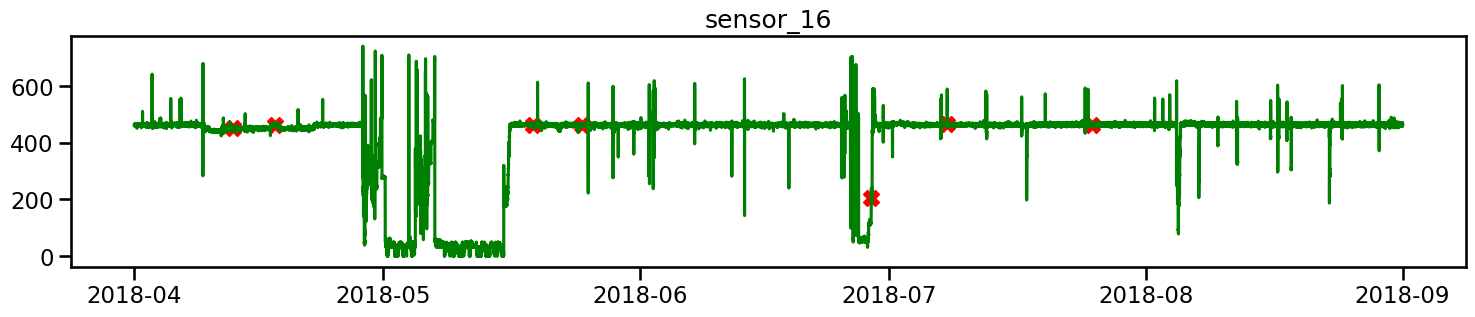

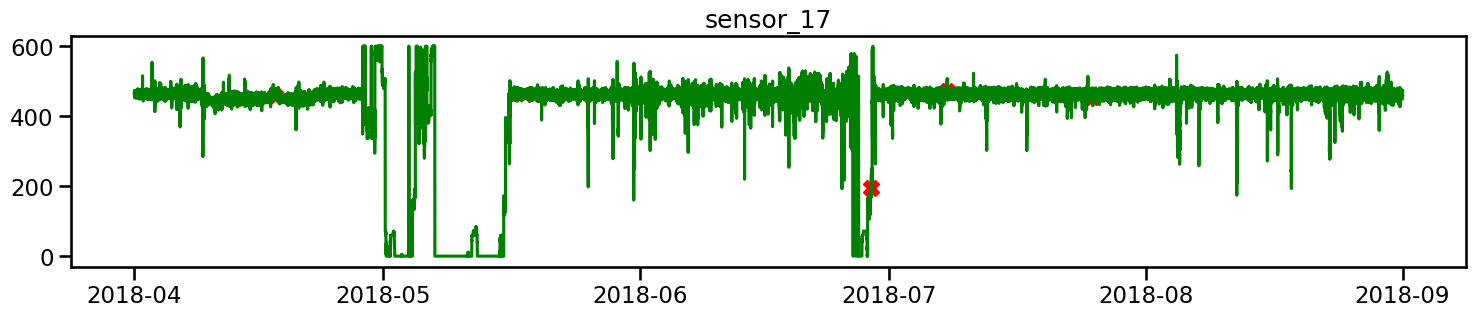

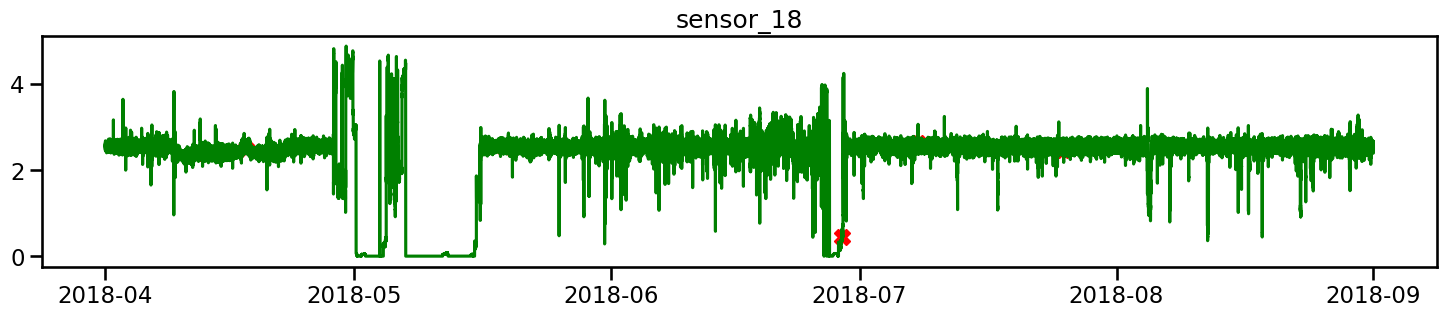

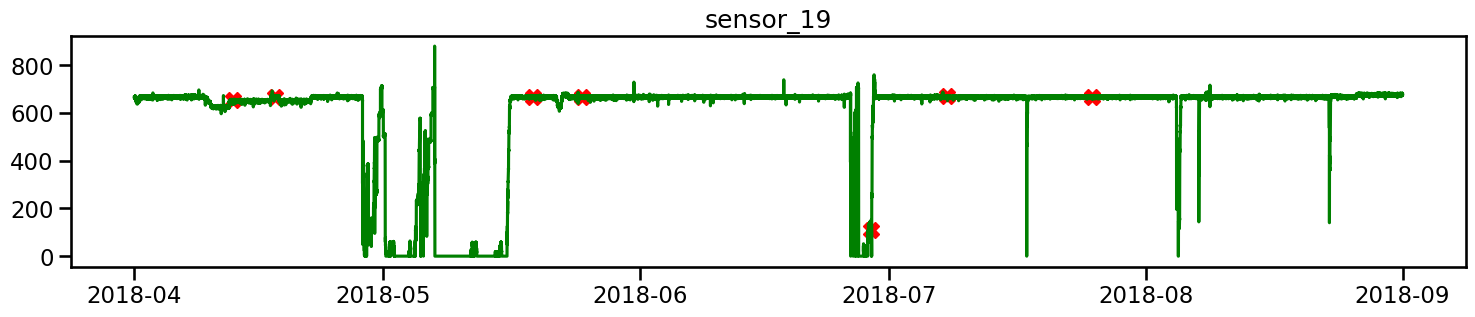

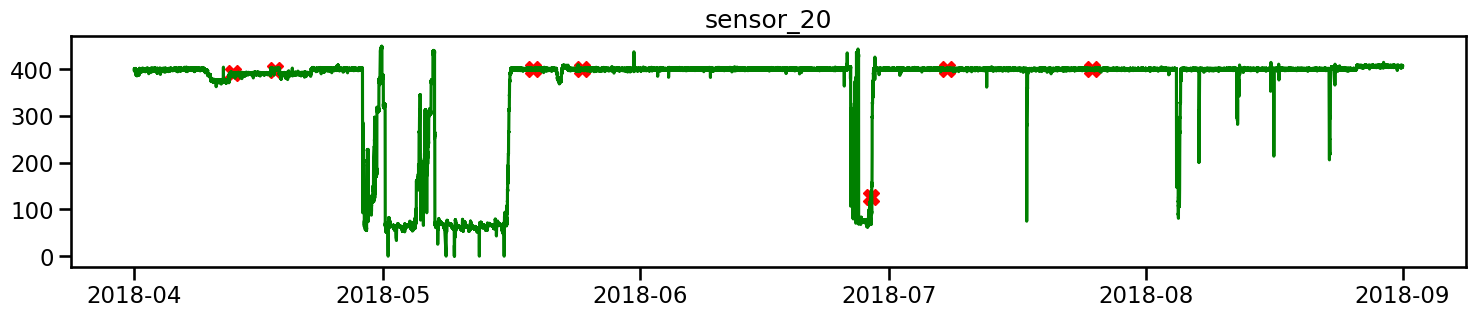

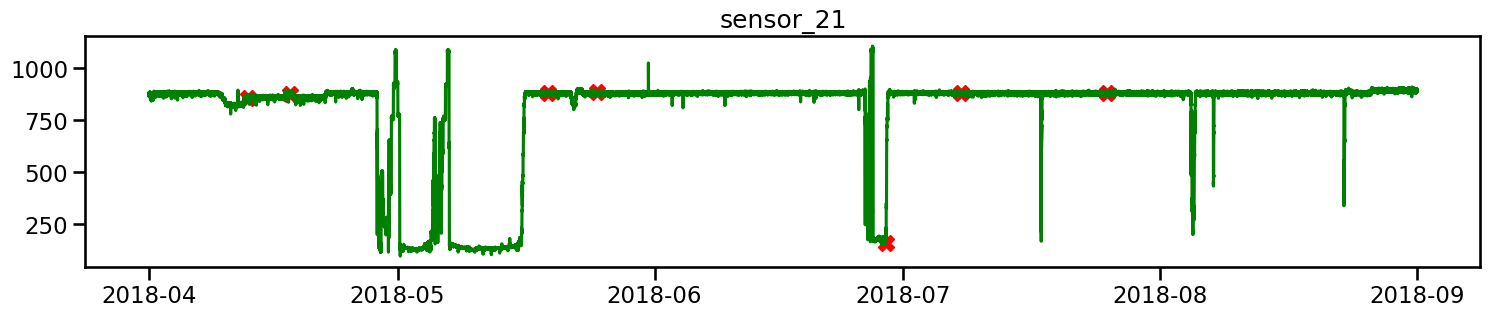

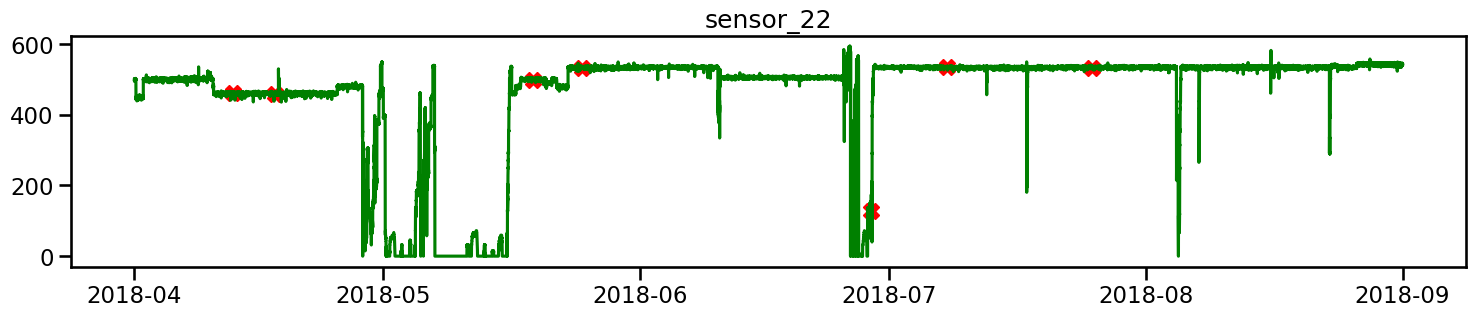

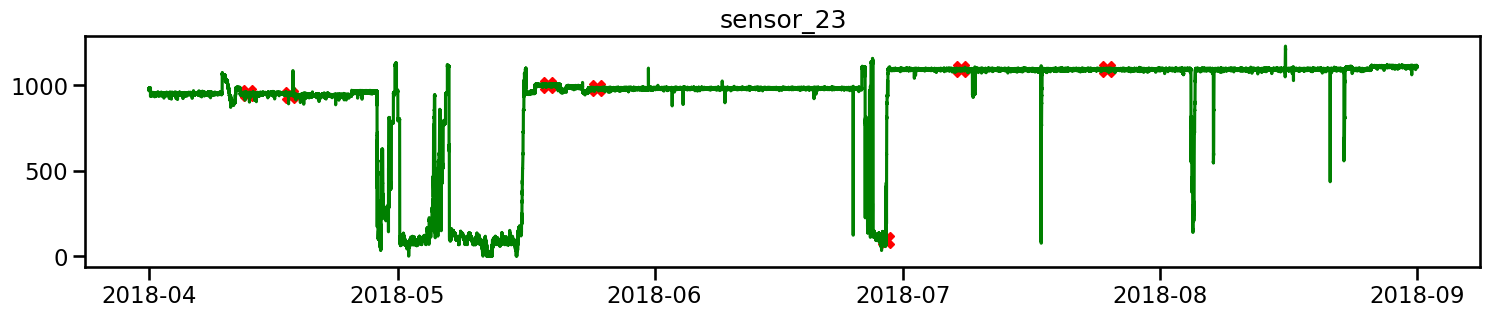

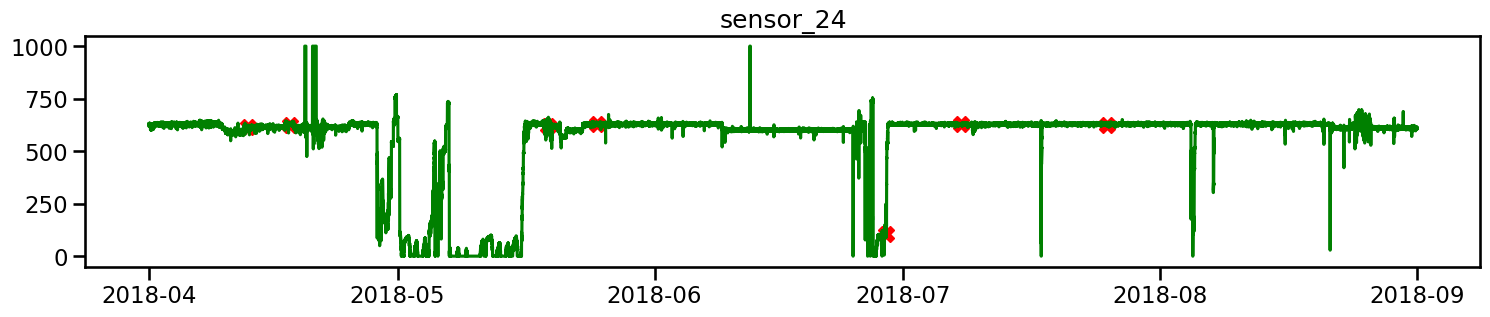

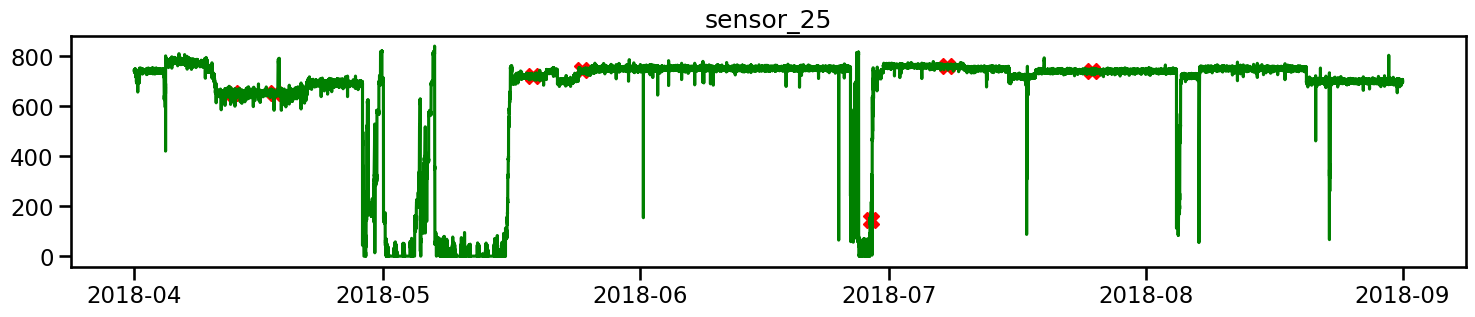

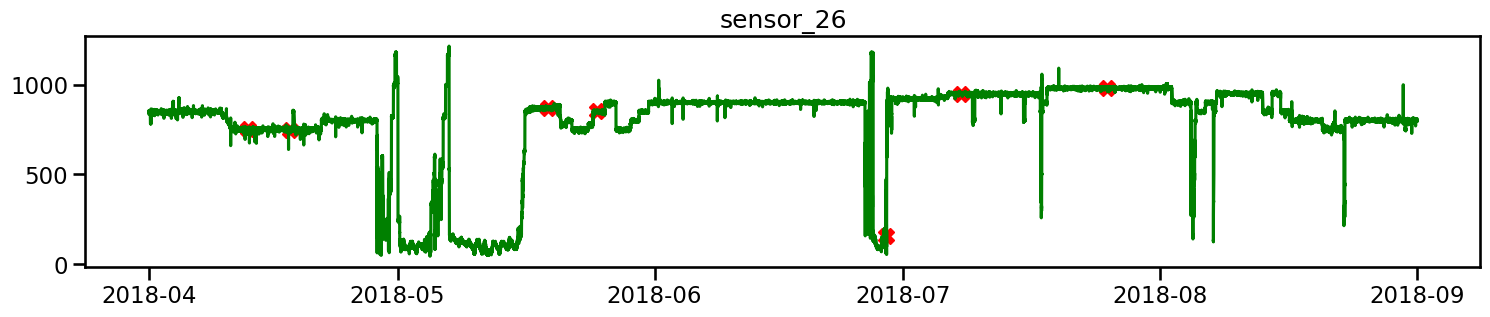

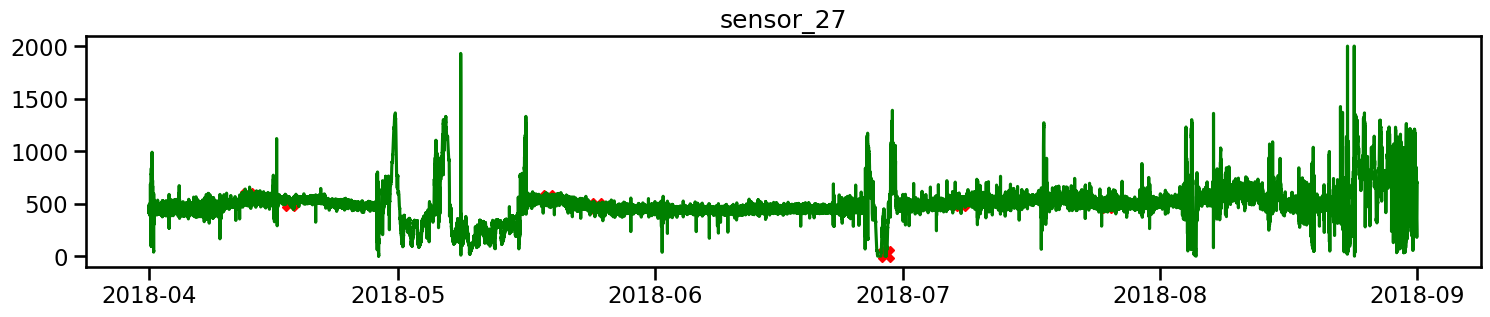

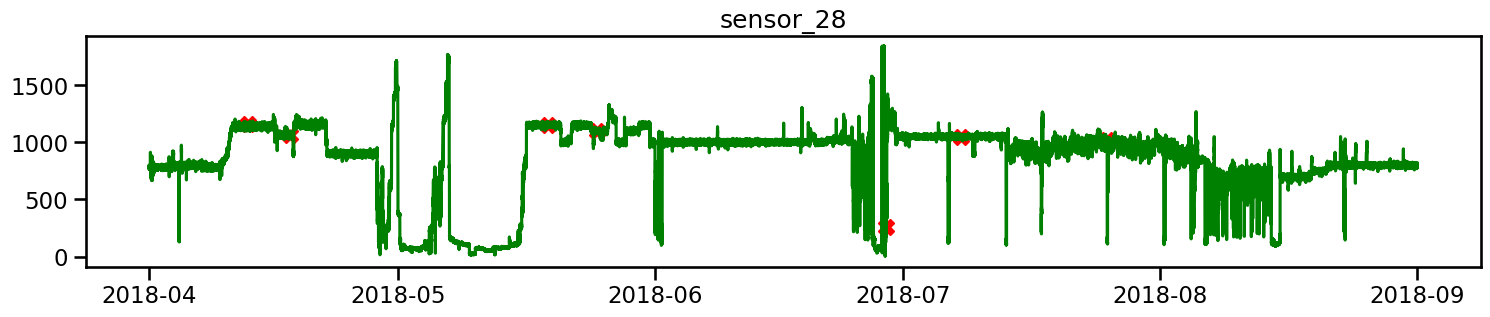

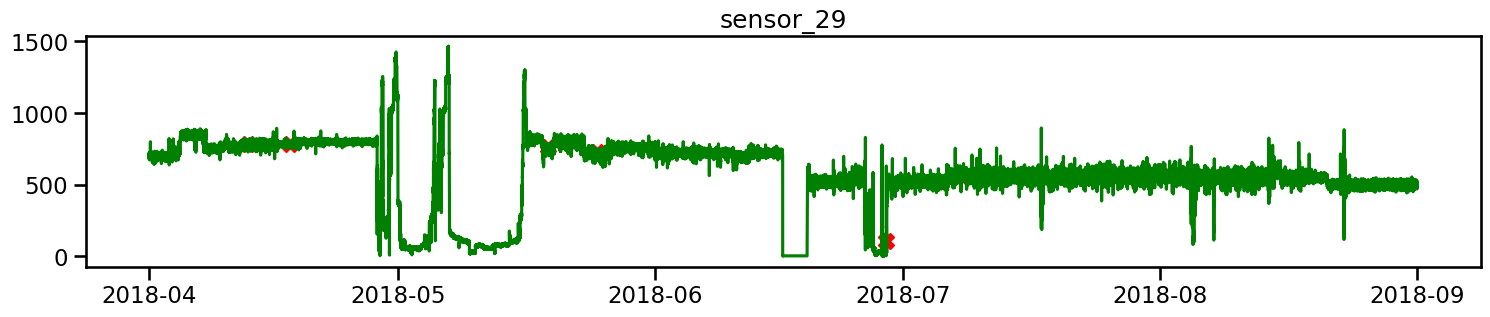

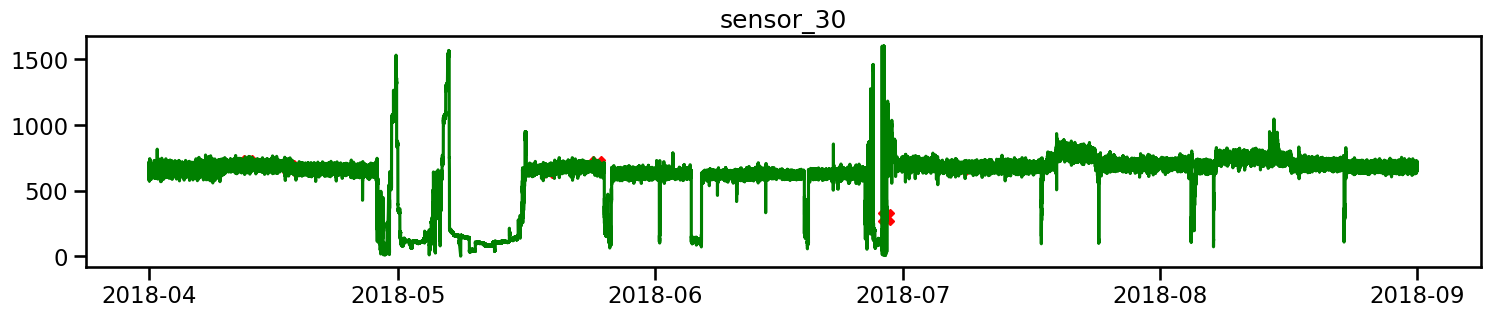

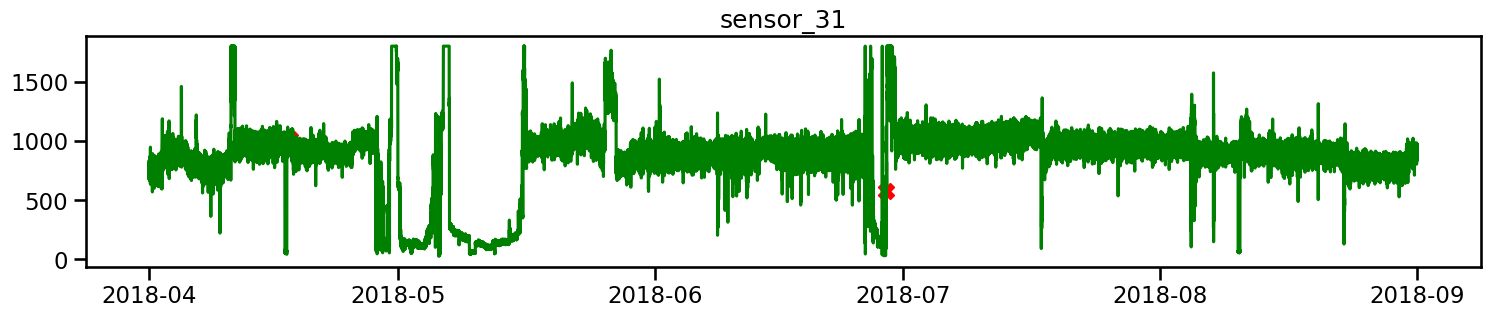

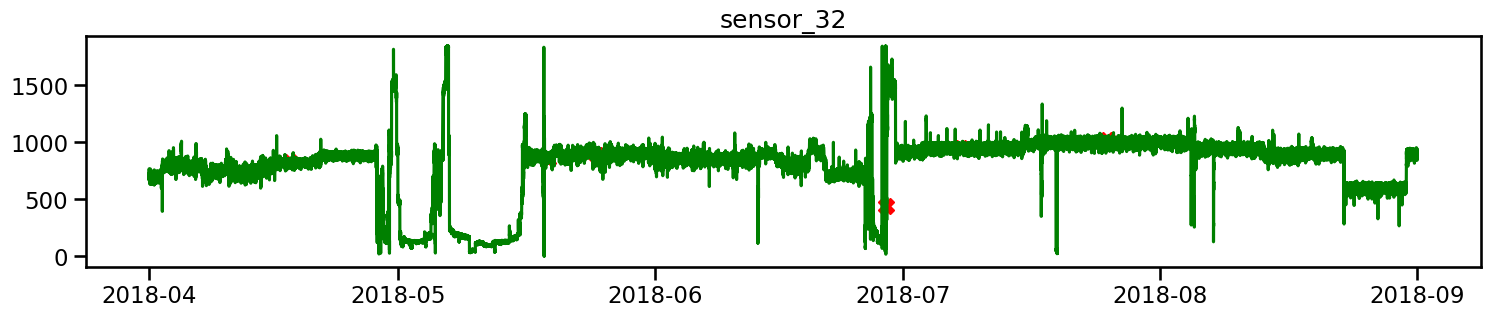

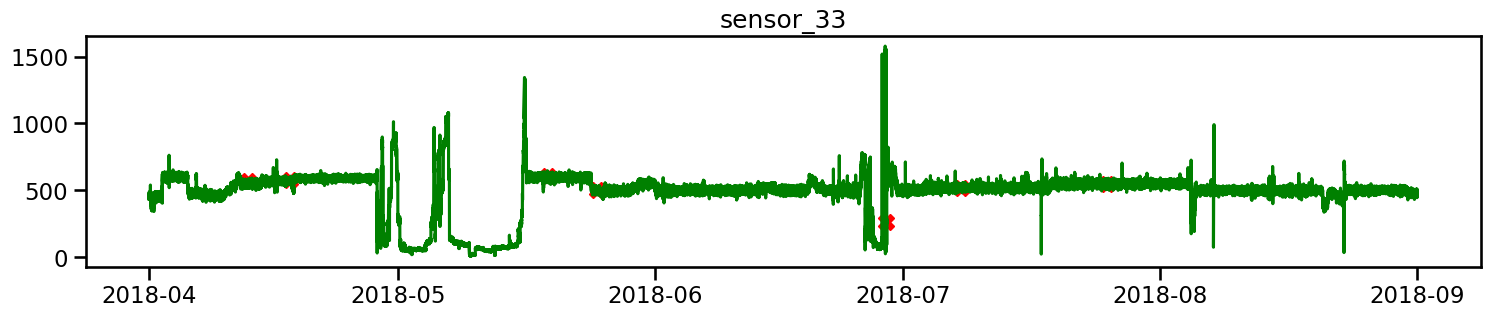

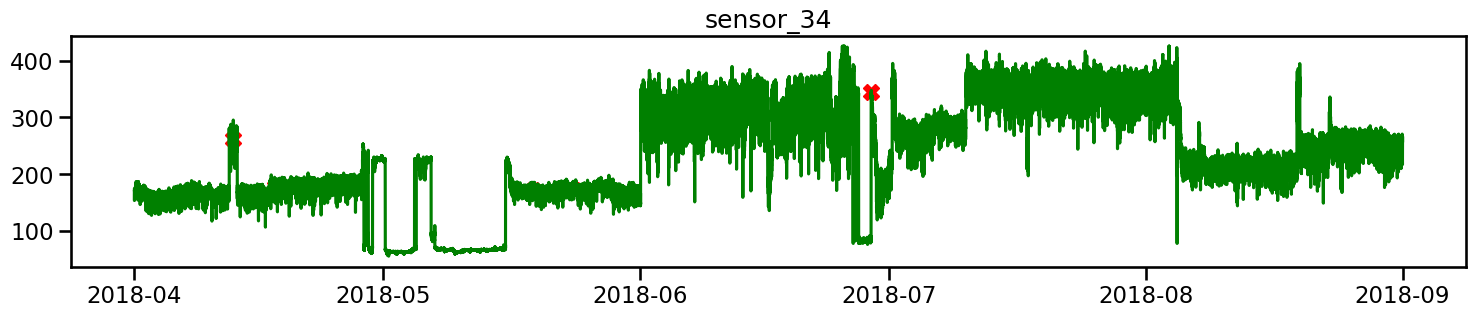

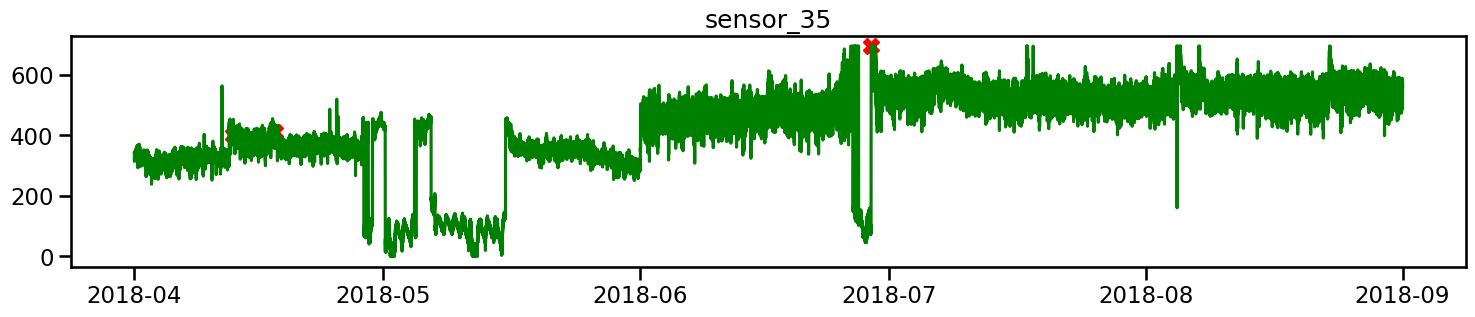

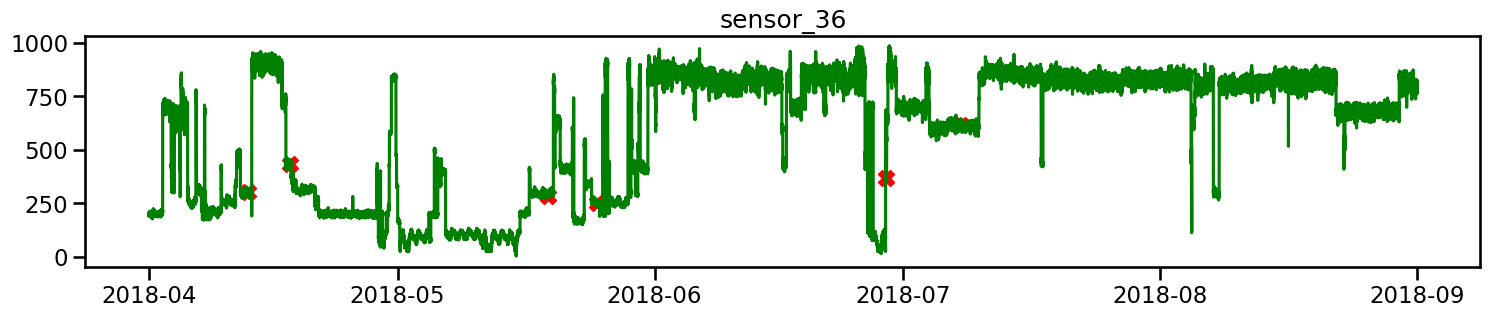

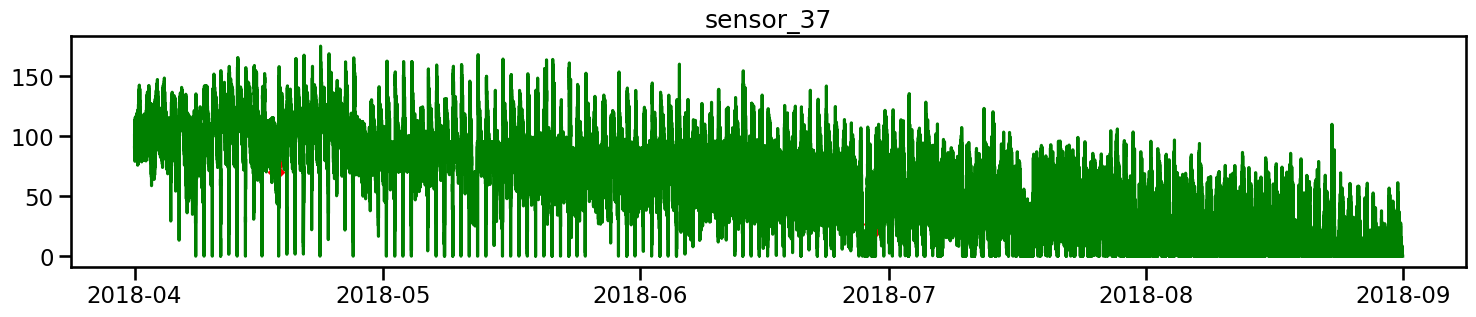

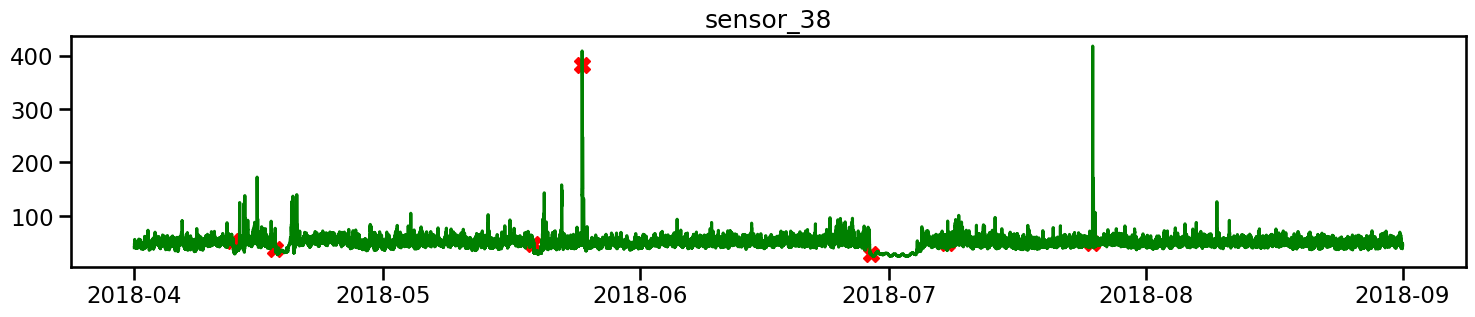

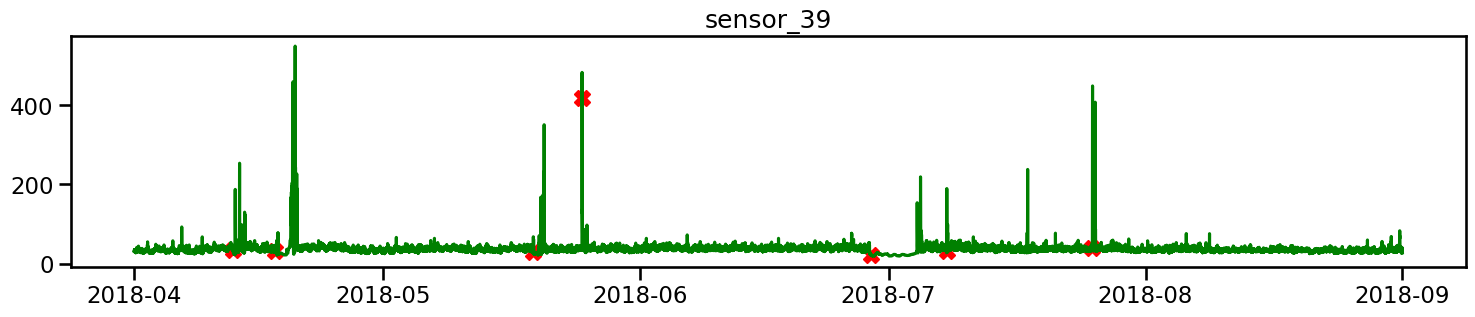

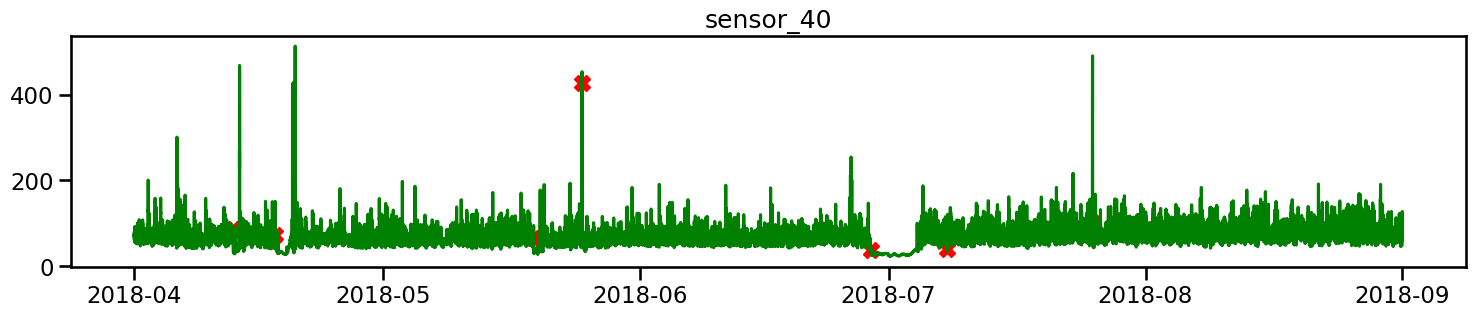

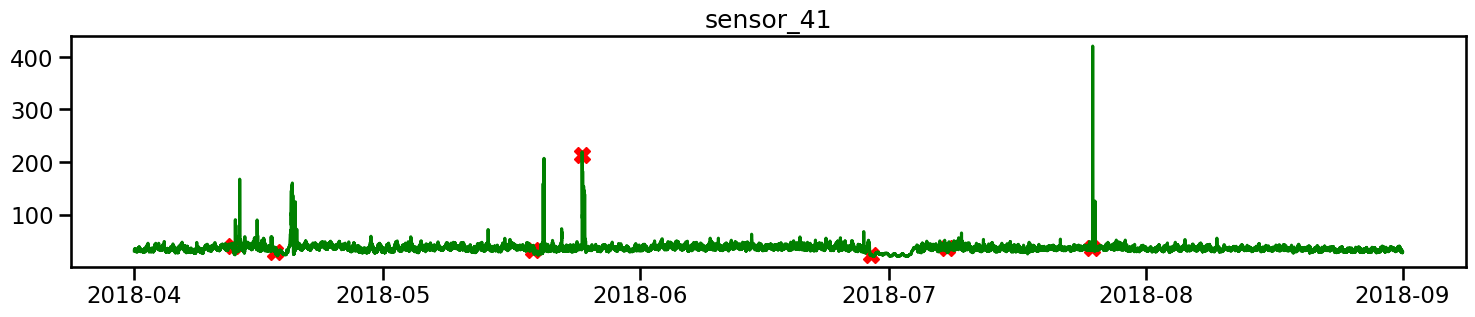

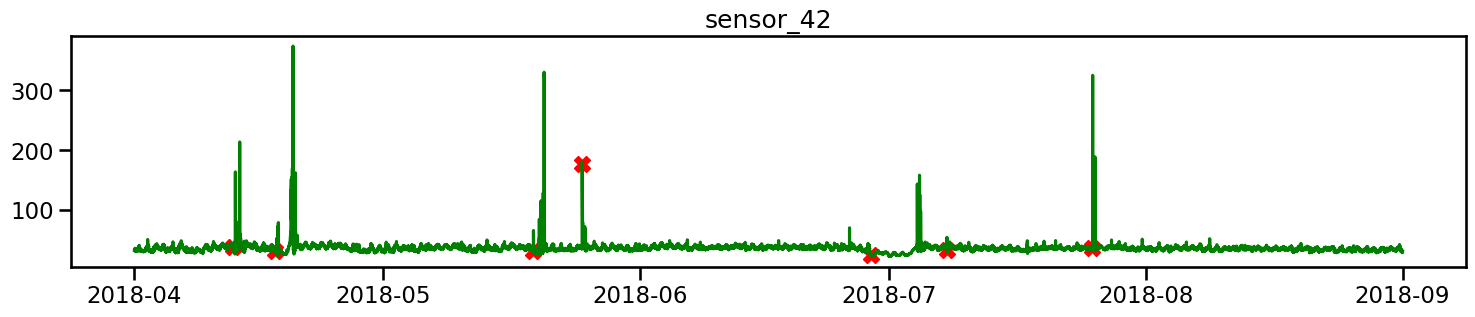

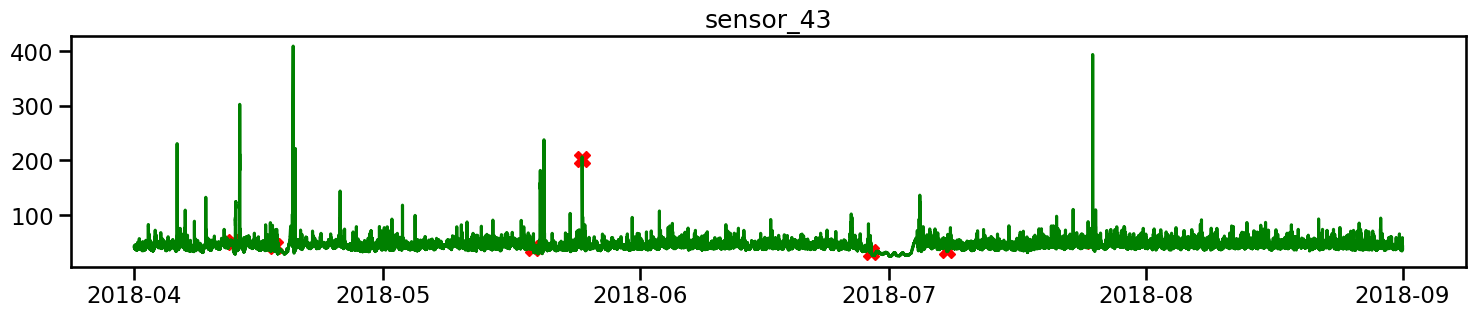

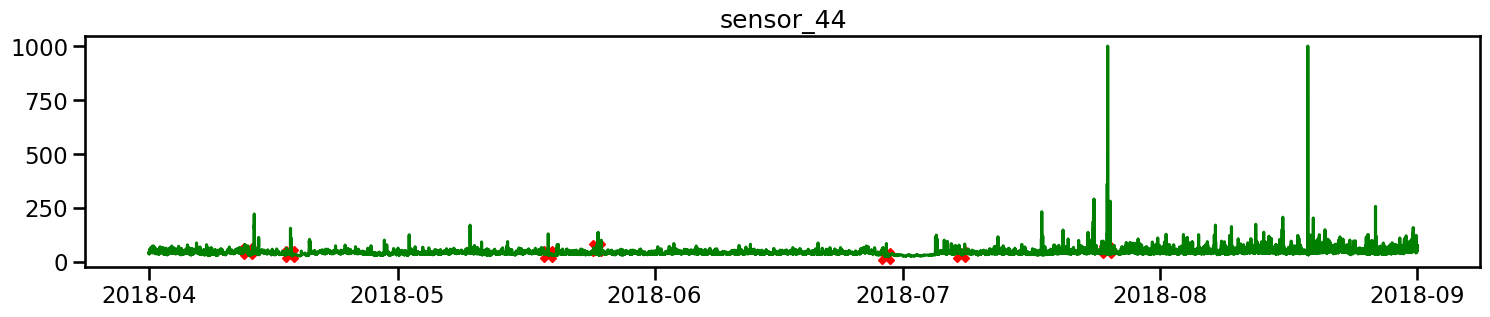

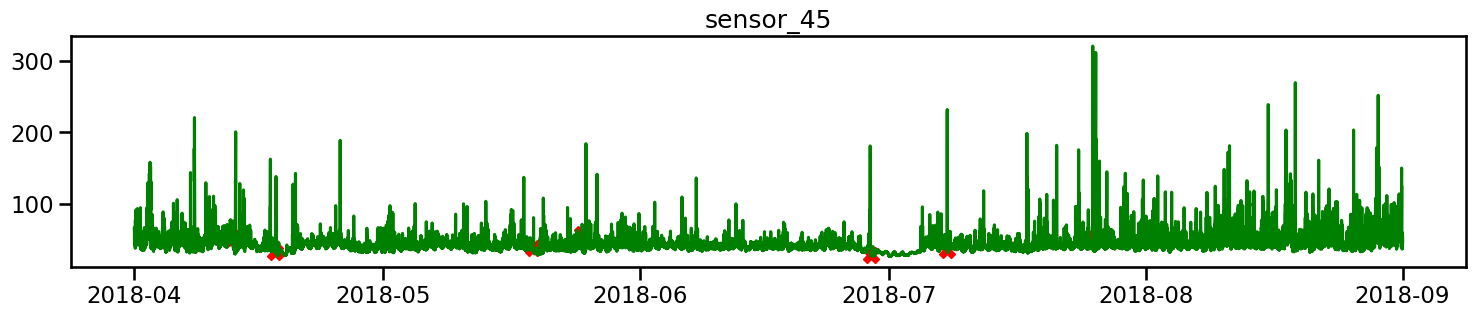

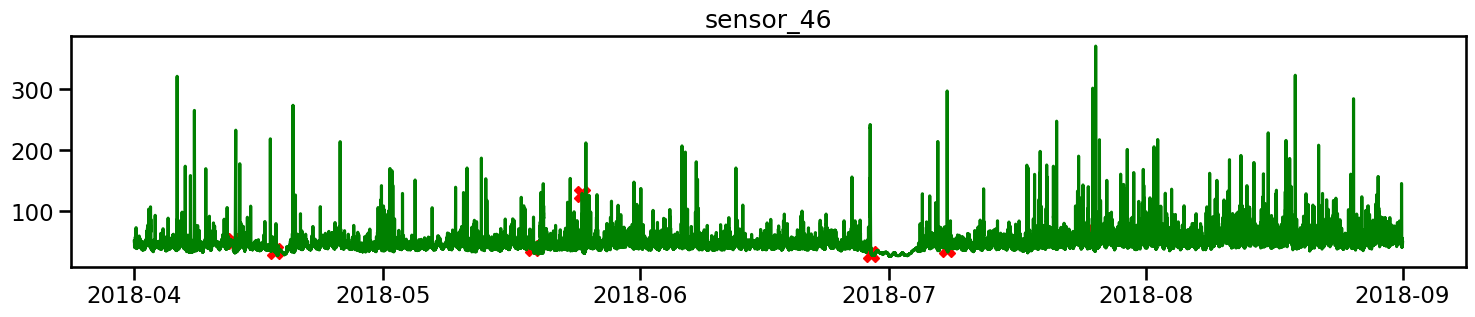

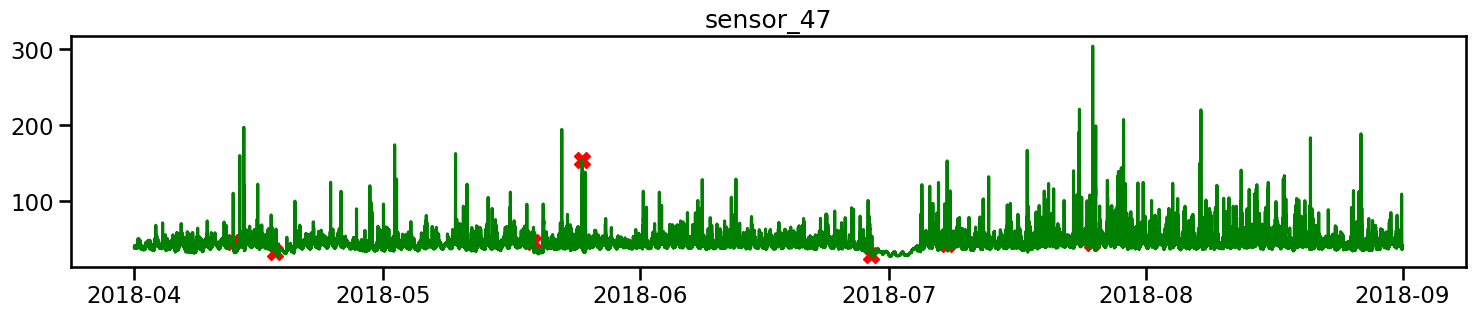

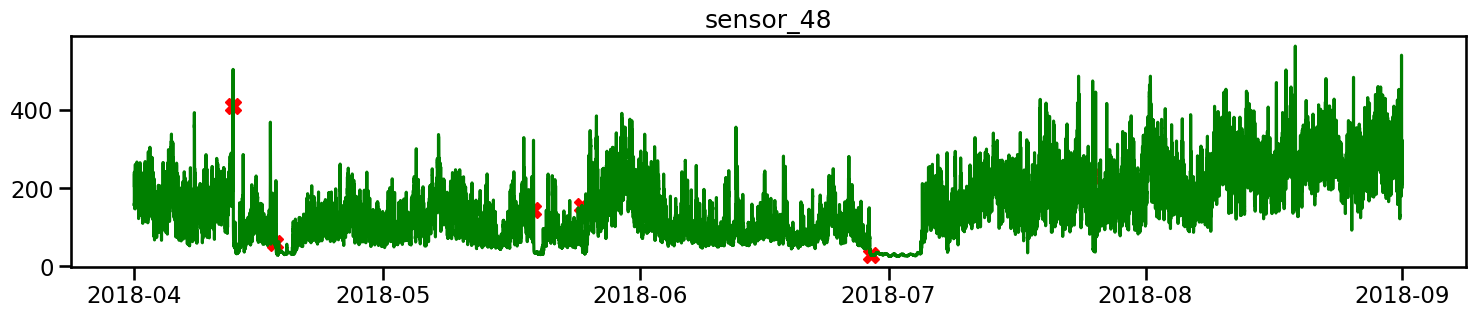

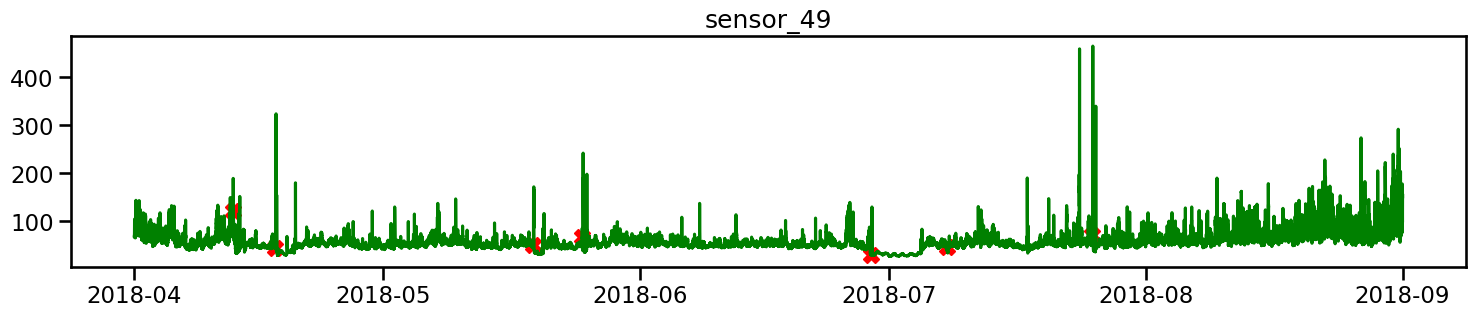

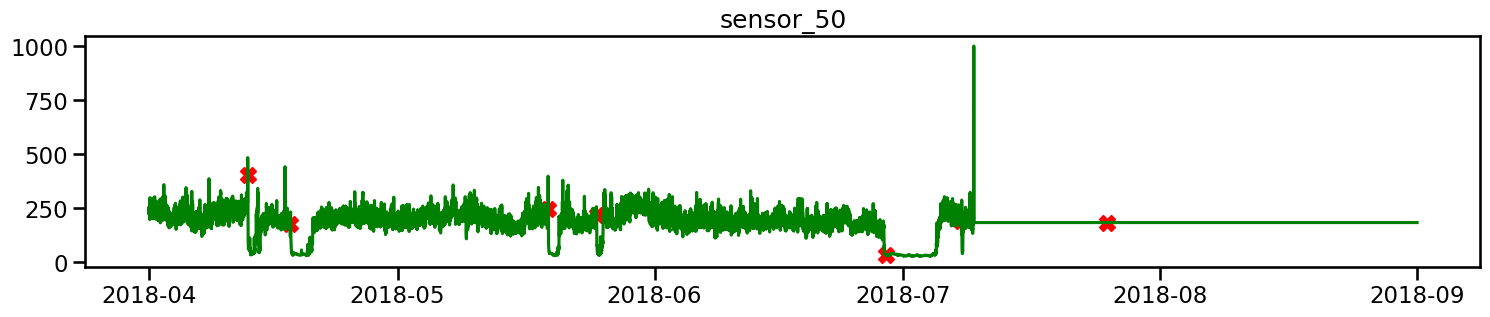

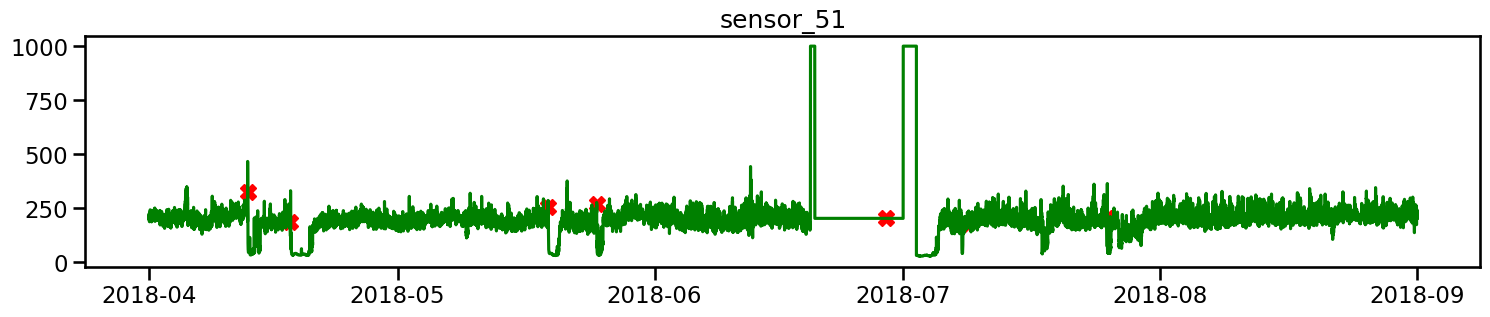

In [18]:
# Visualize time series and the BROKEN state (red dots) in the same graph for each sensor
# Extract the readings from BROKEN state and resample by daily average
broken = df[df['machine_status']=='BROKEN']
# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names = df2.columns
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    sns.set_context('talk')
    plt.figure(figsize=(18,3))
    plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    plt.plot(df[name], color='green')
    plt.title(name)
    plt.show()

In [19]:
# Resample the entire dataset by daily average
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()

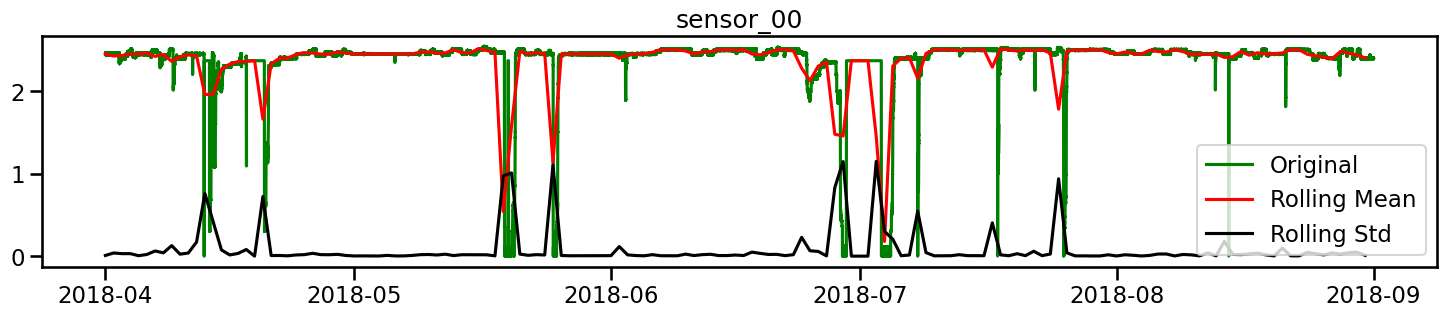

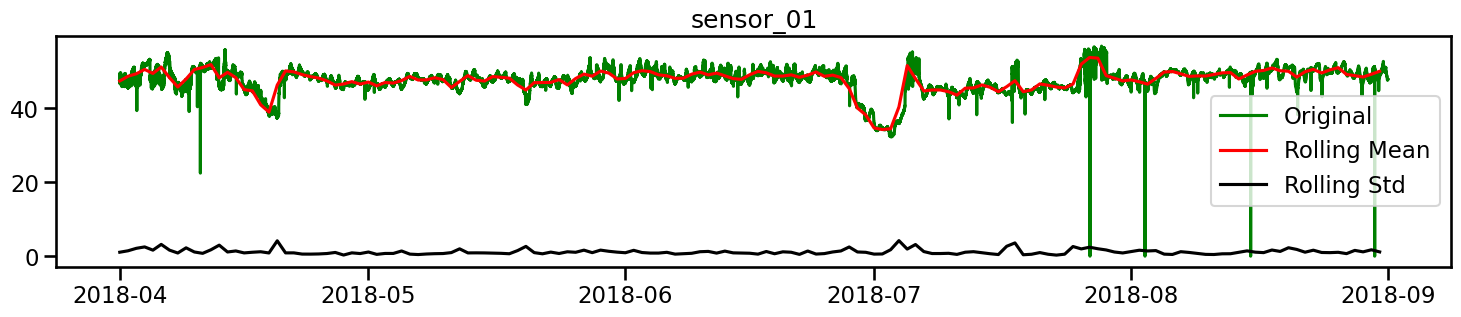

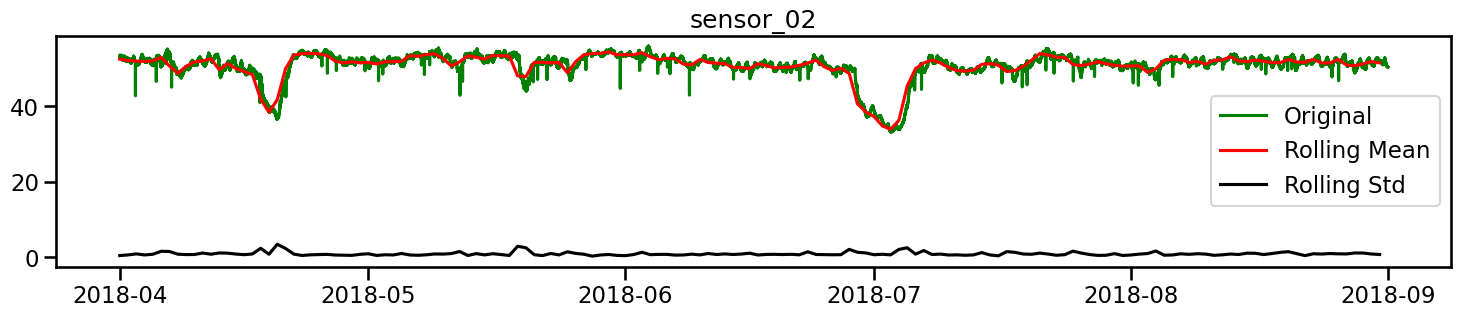

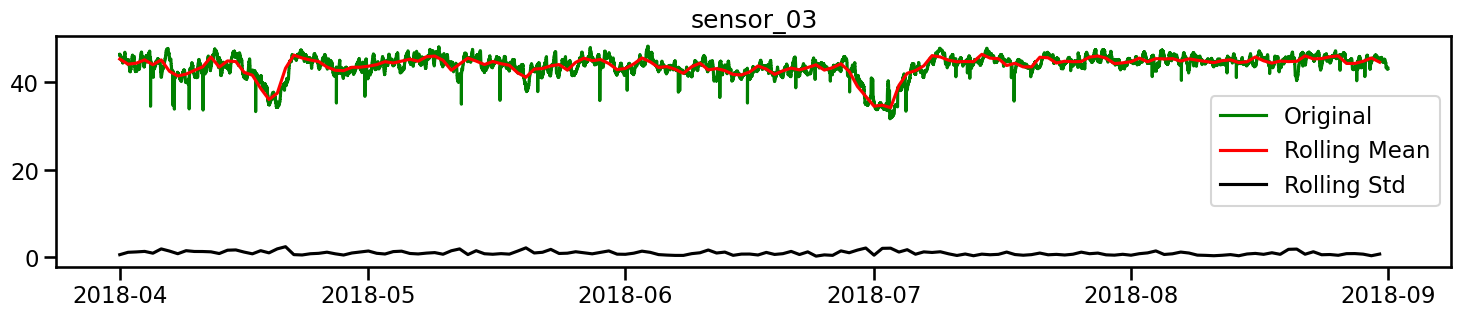

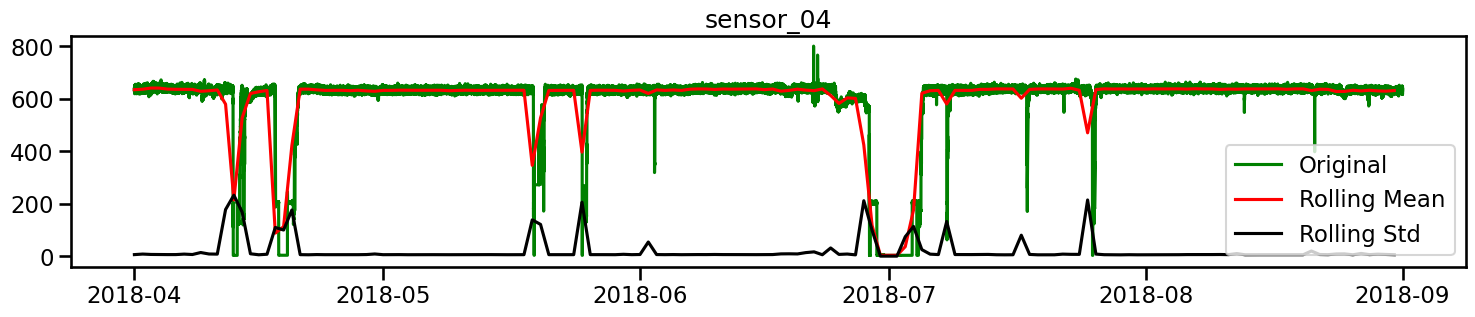

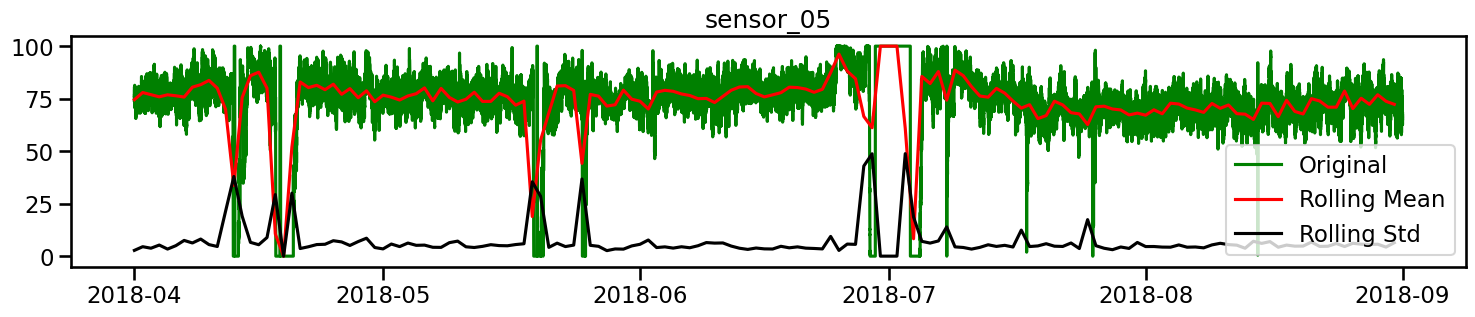

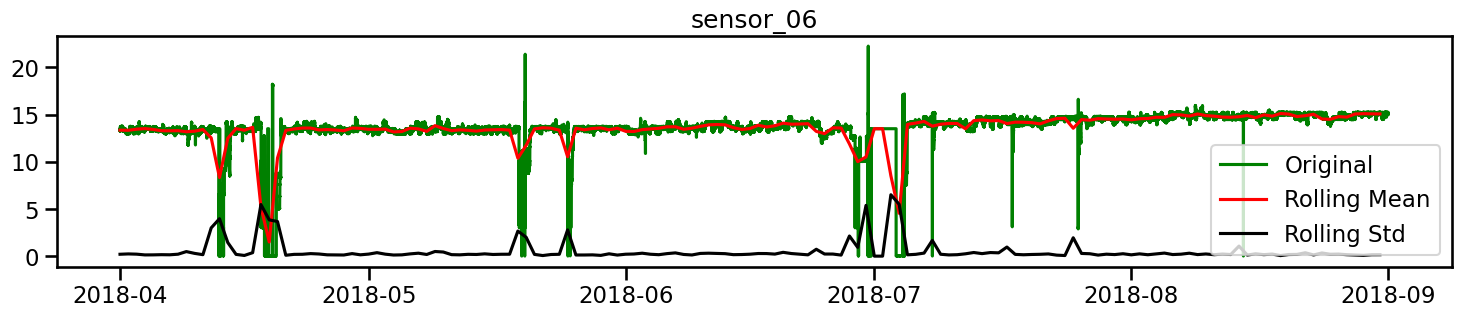

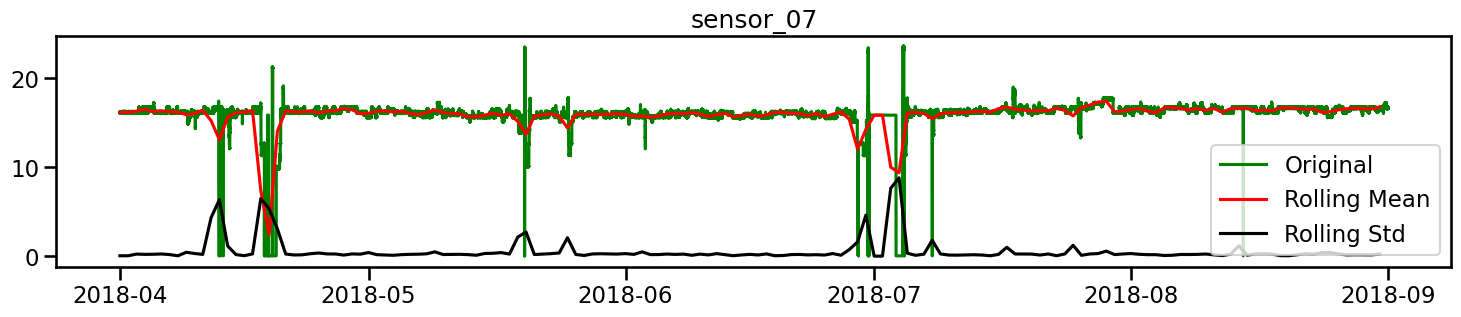

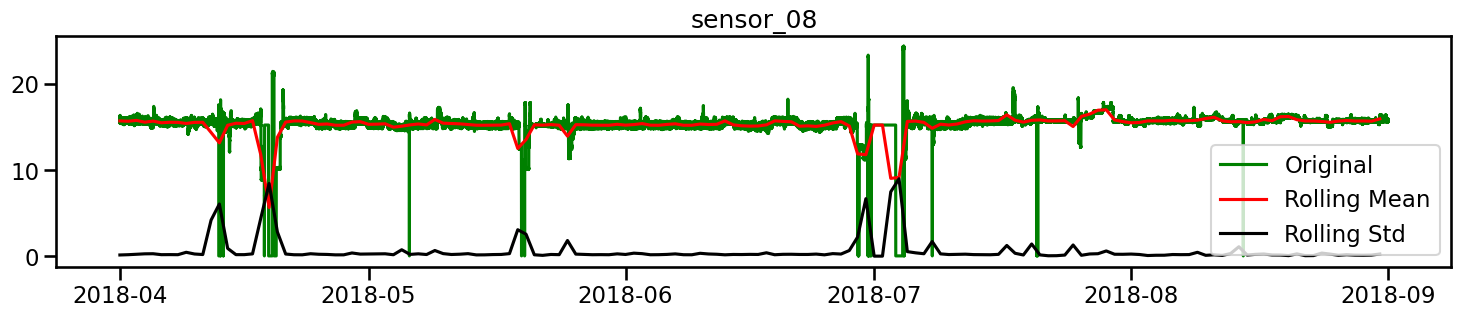

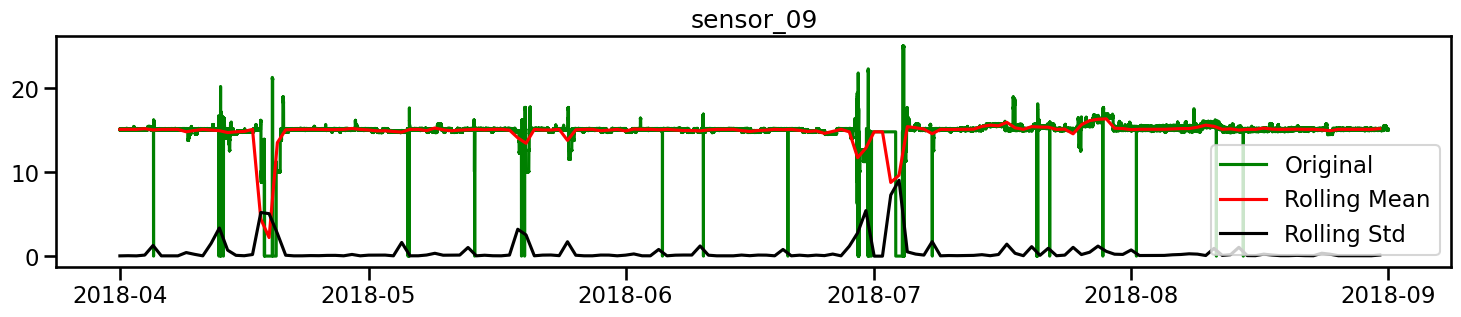

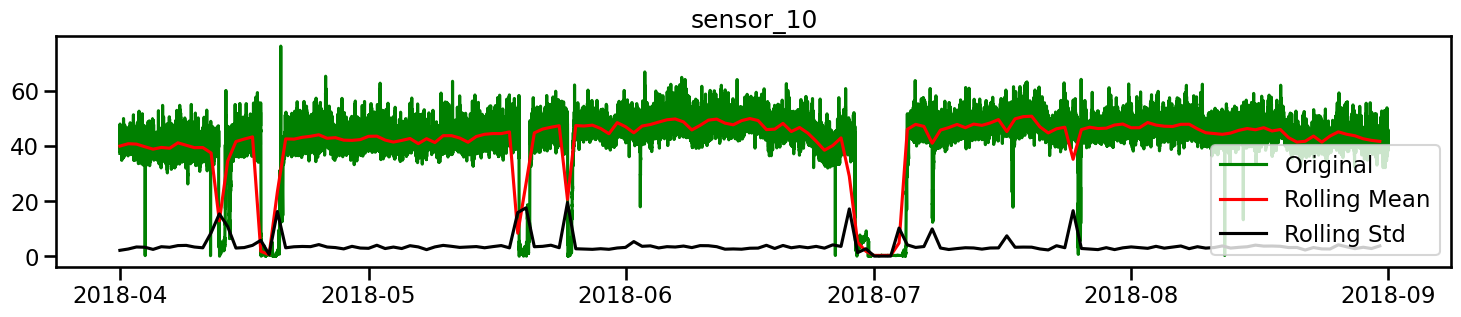

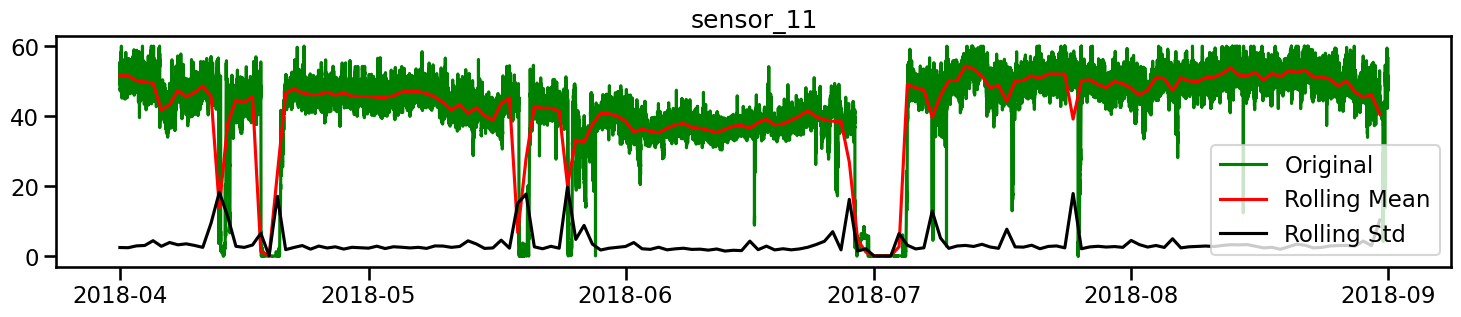

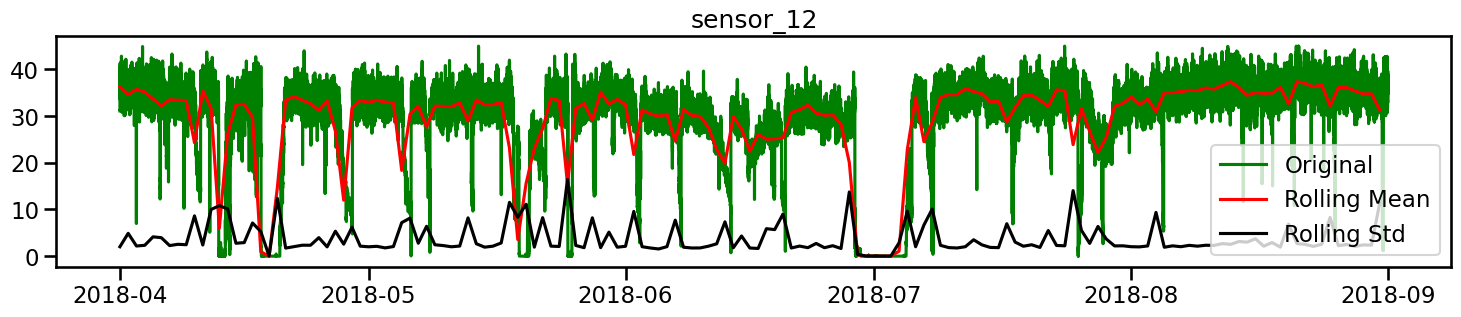

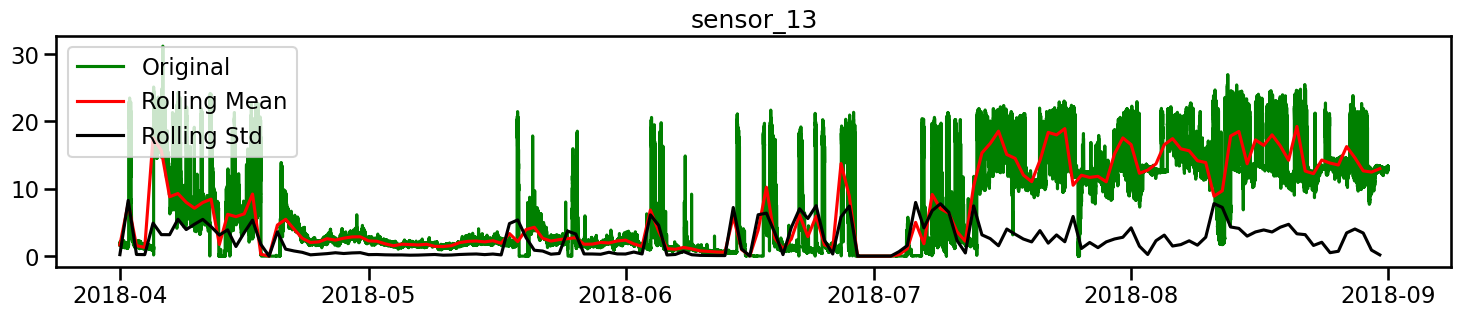

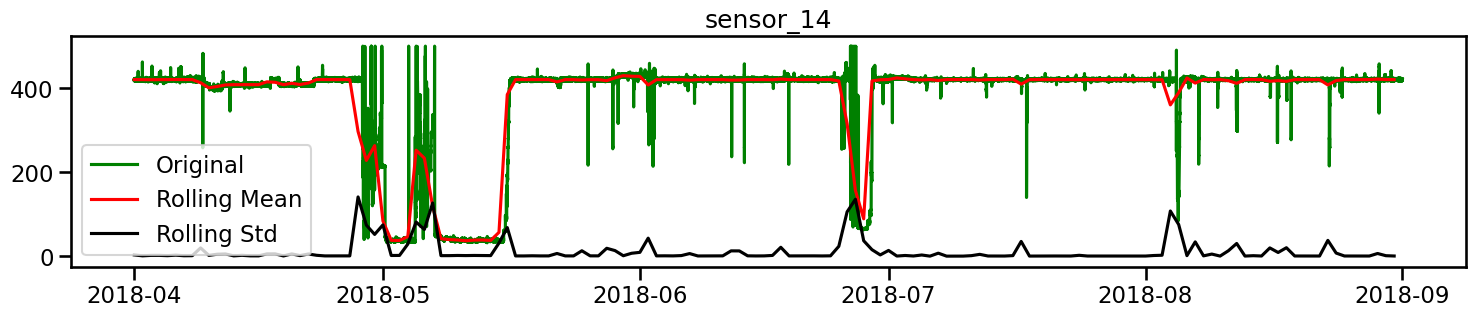

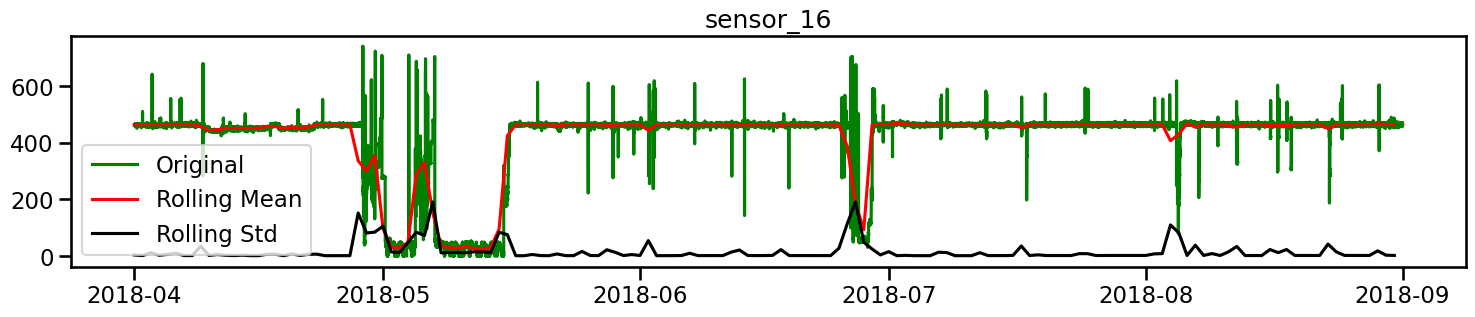

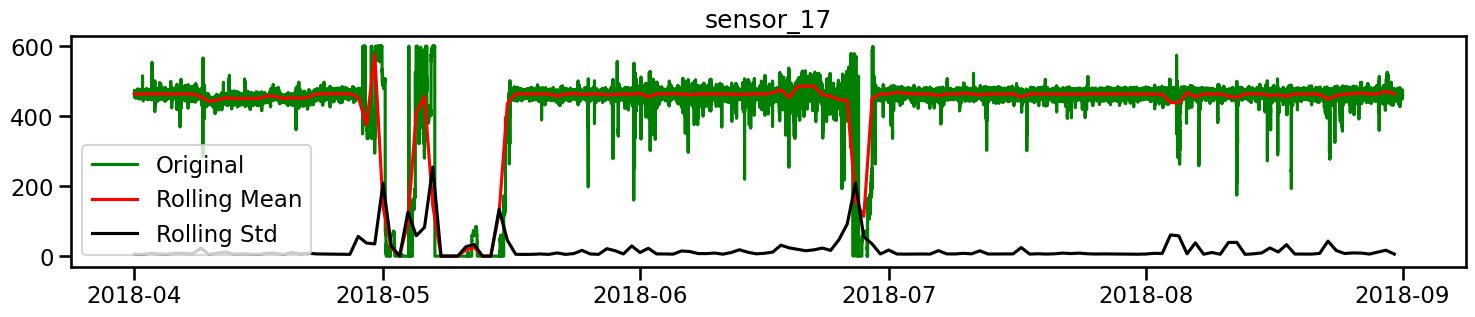

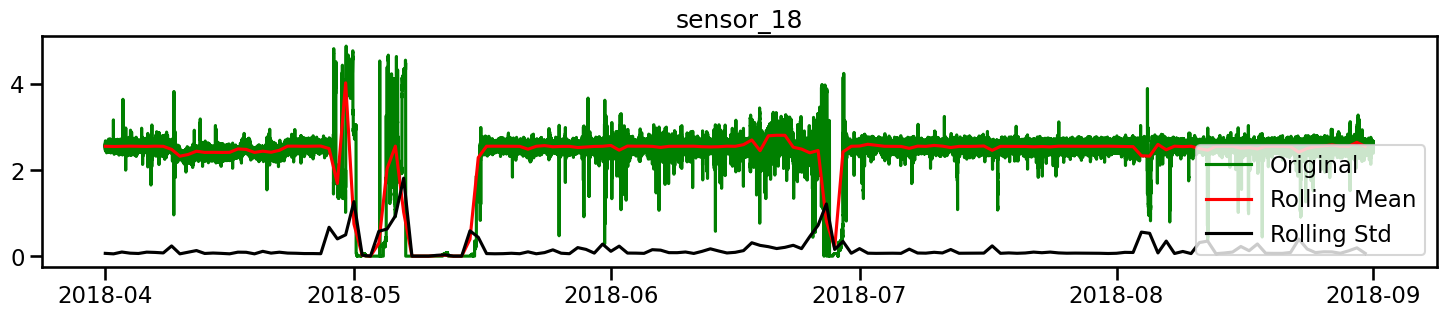

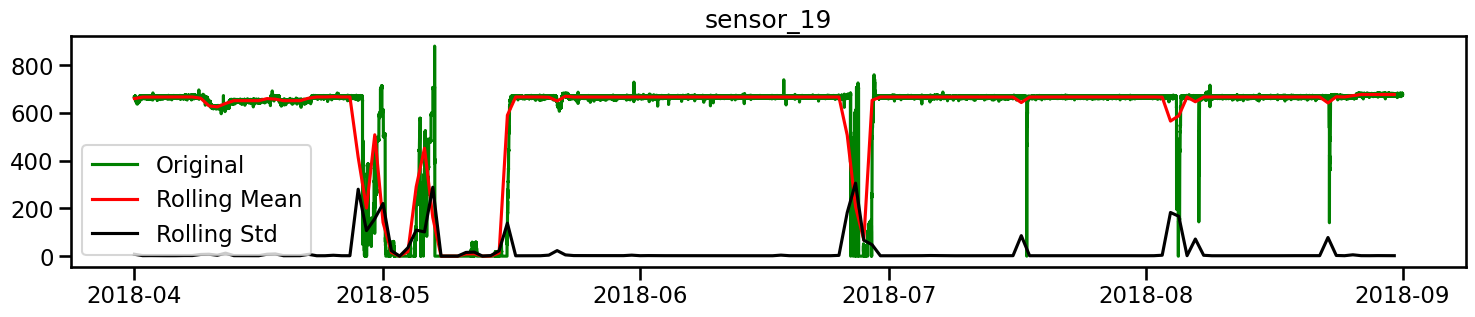

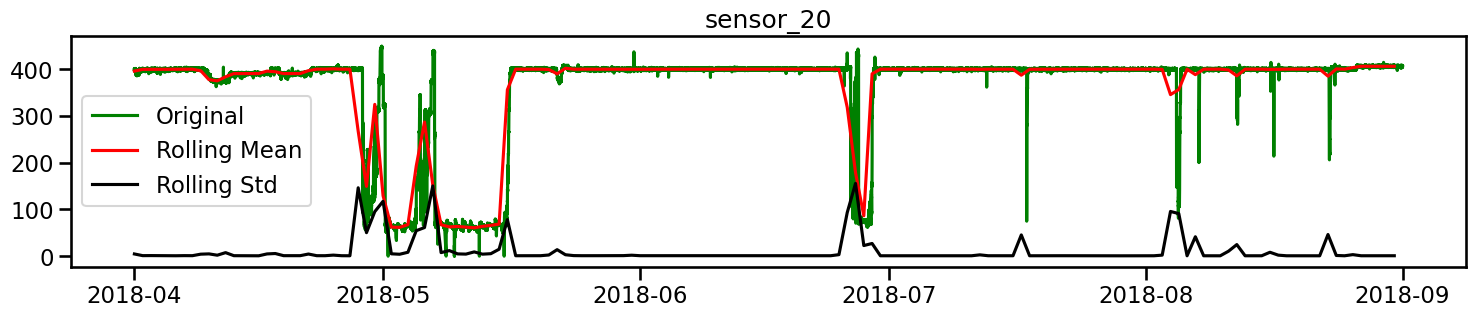

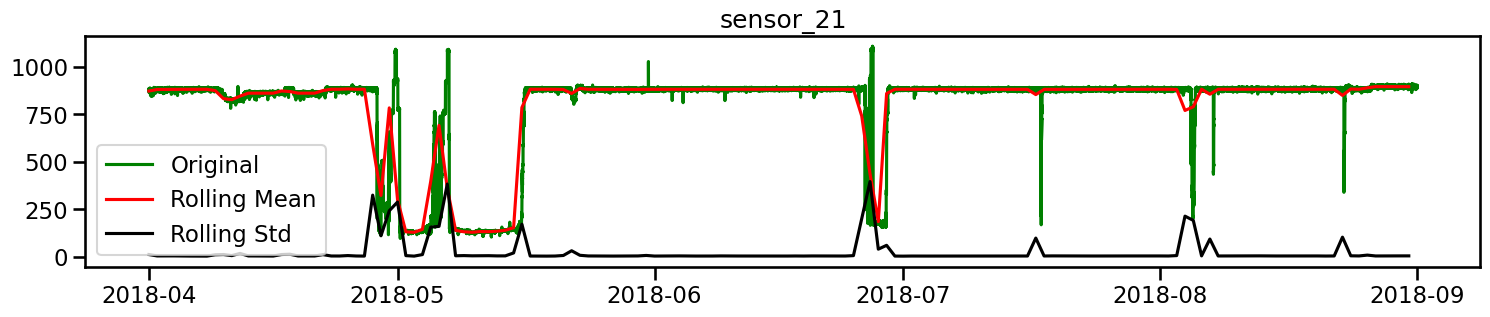

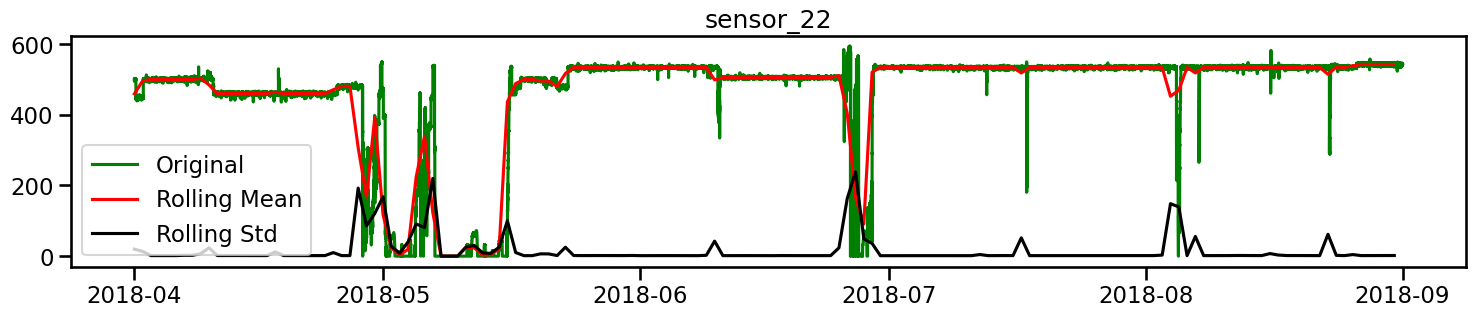

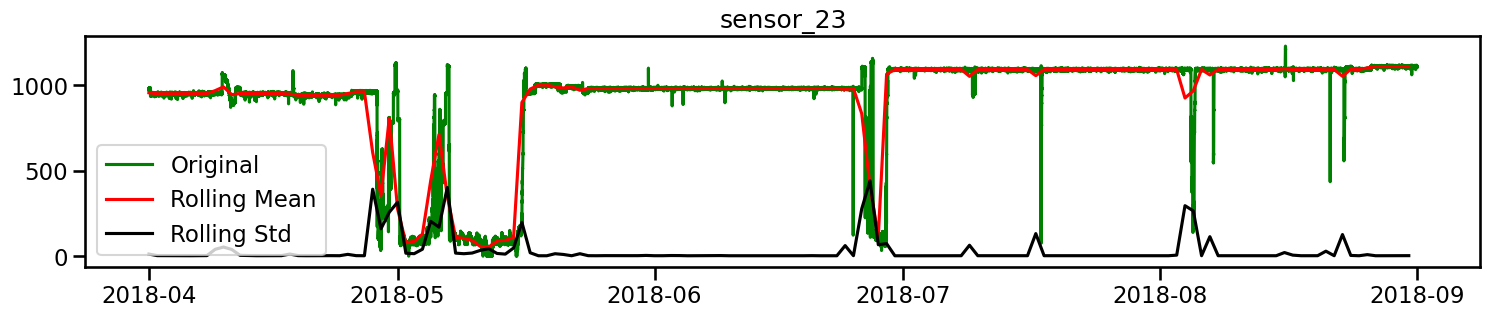

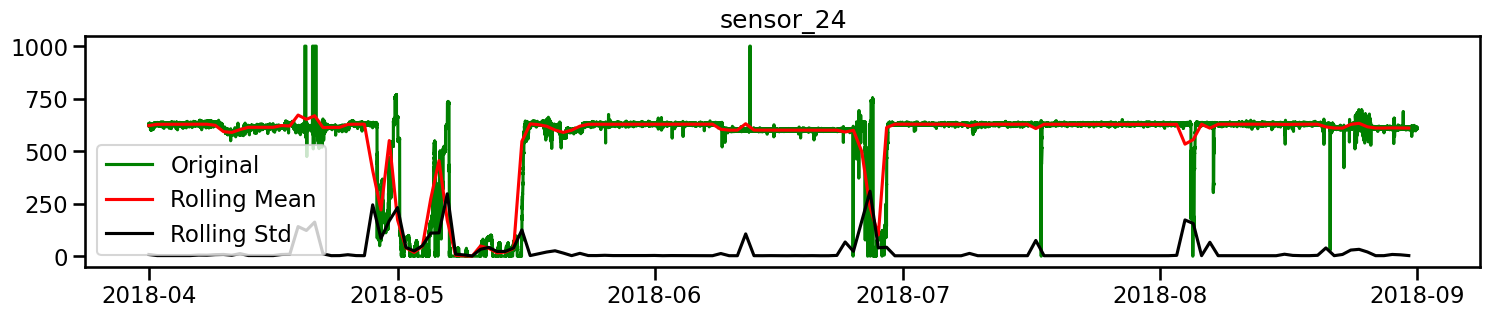

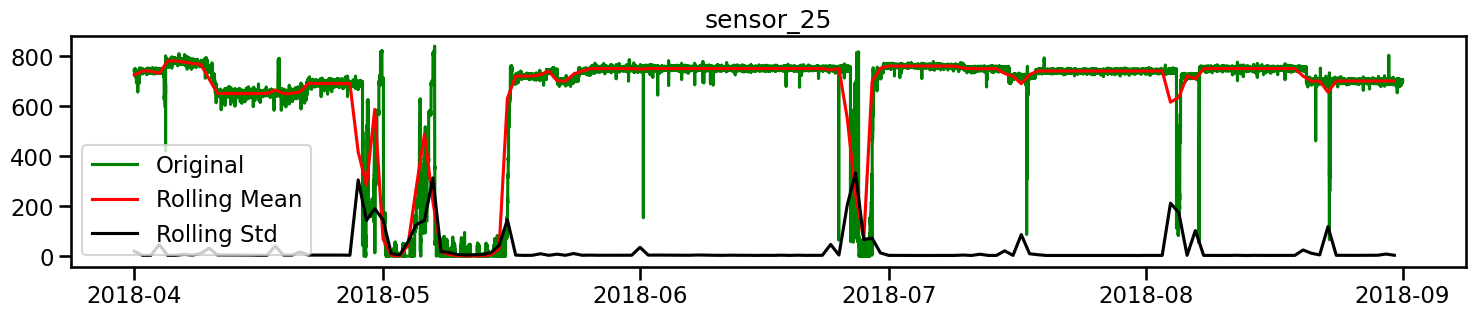

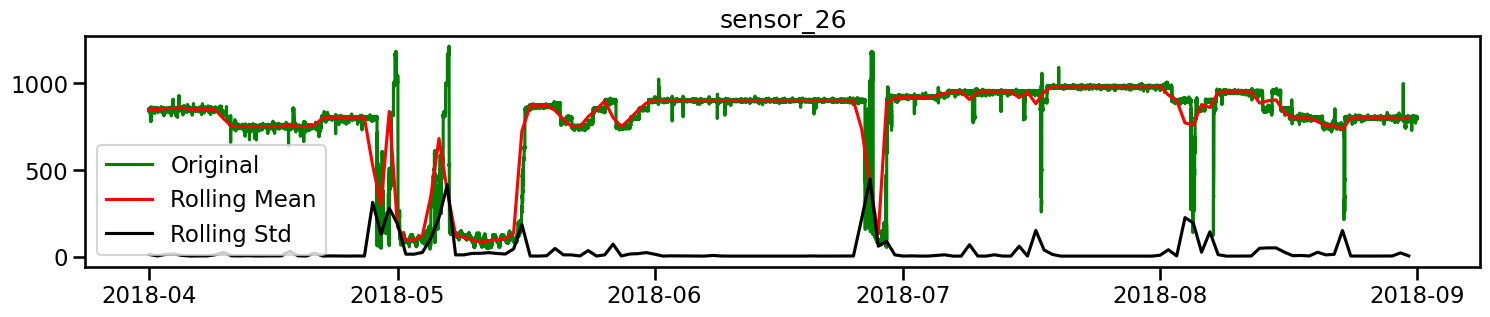

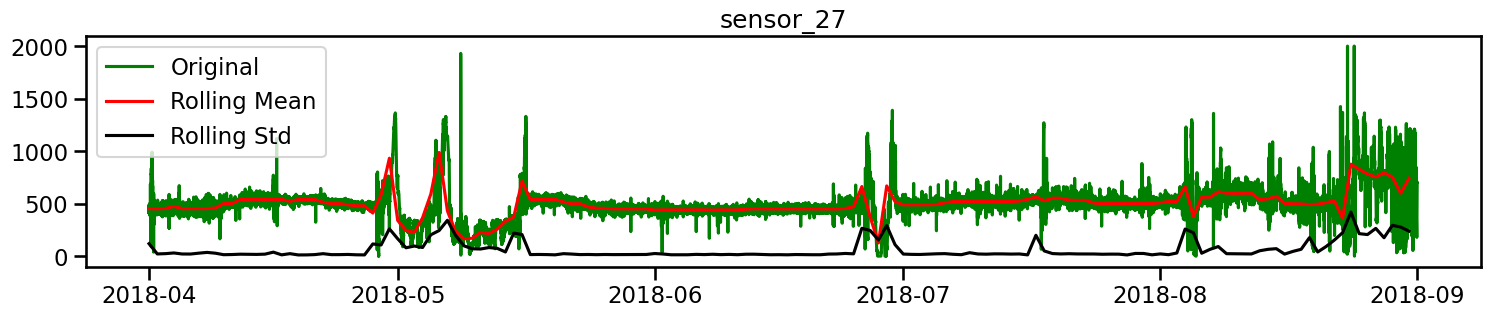

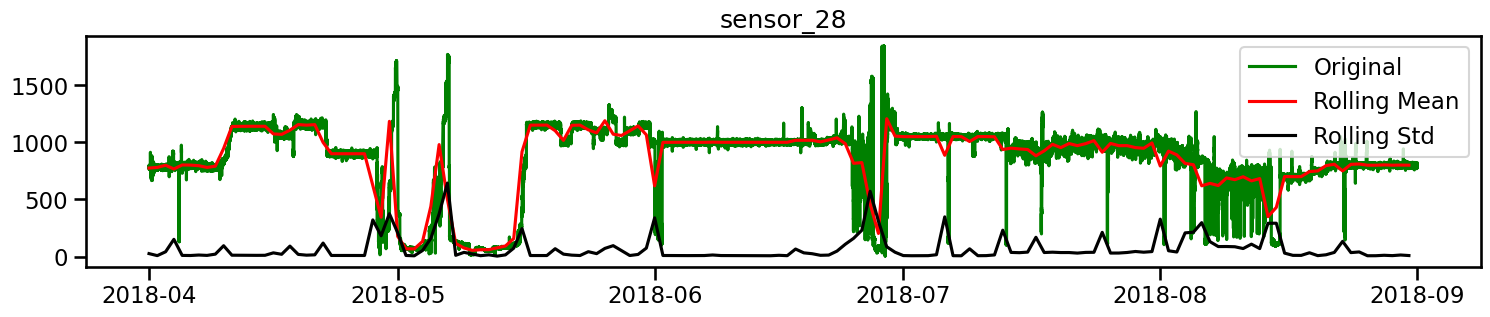

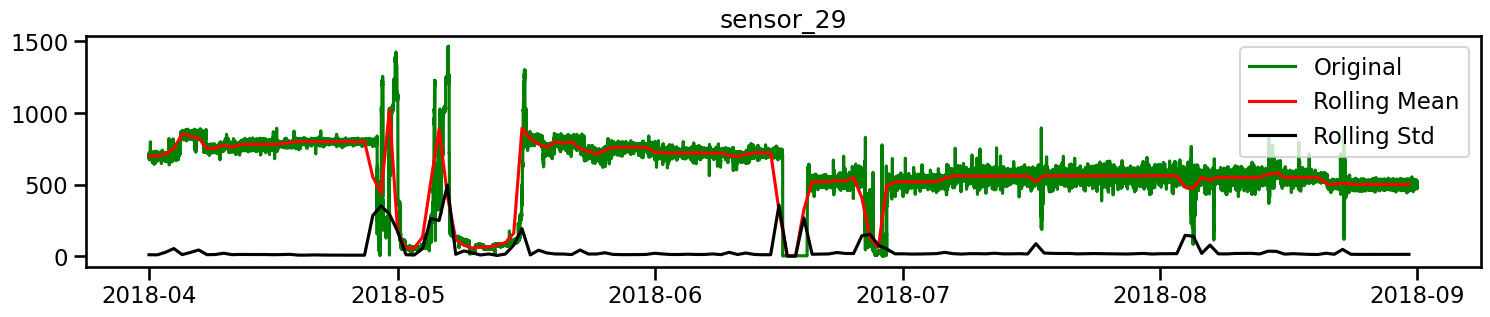

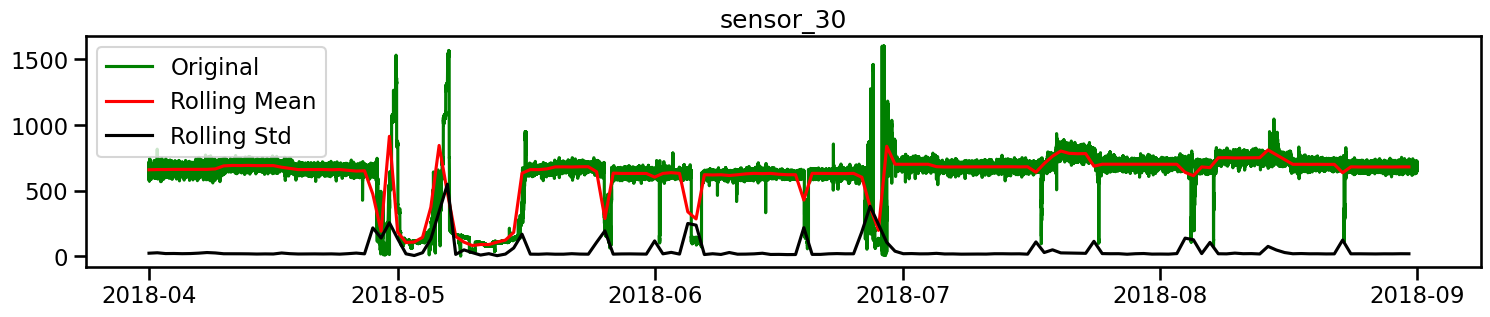

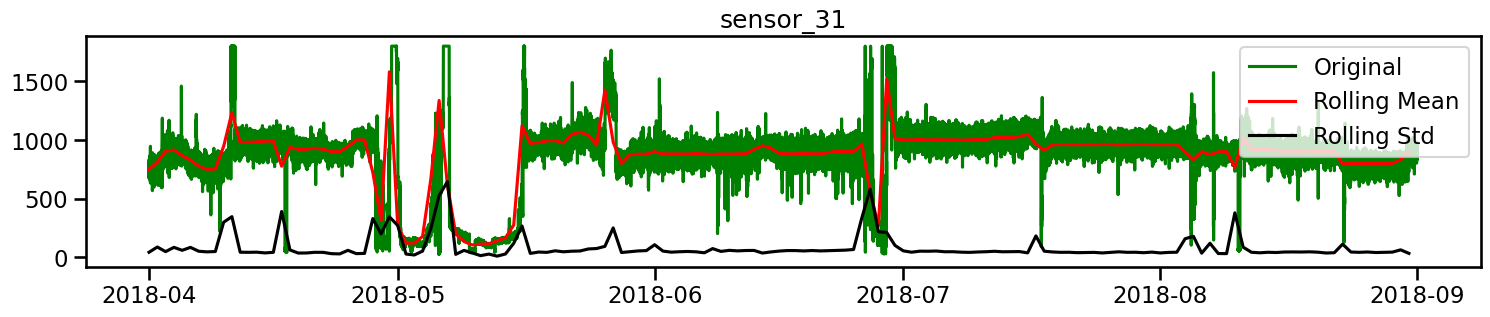

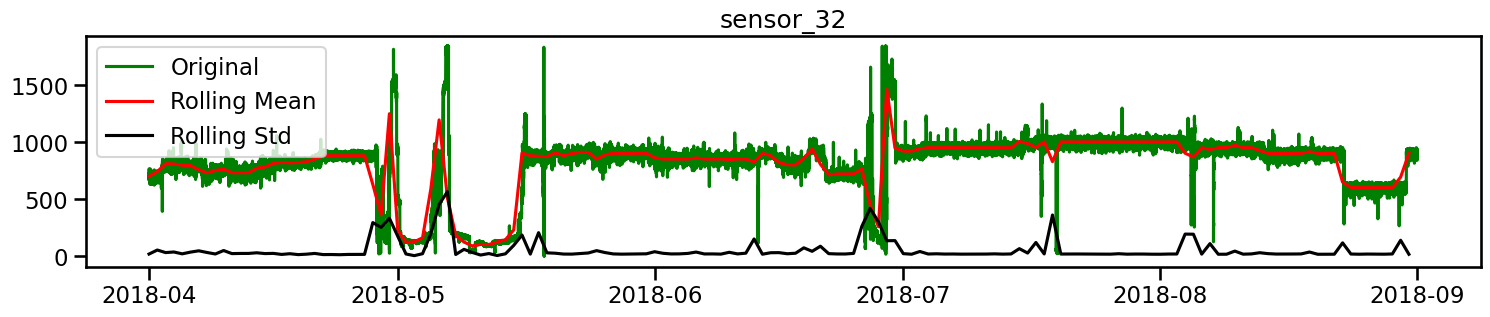

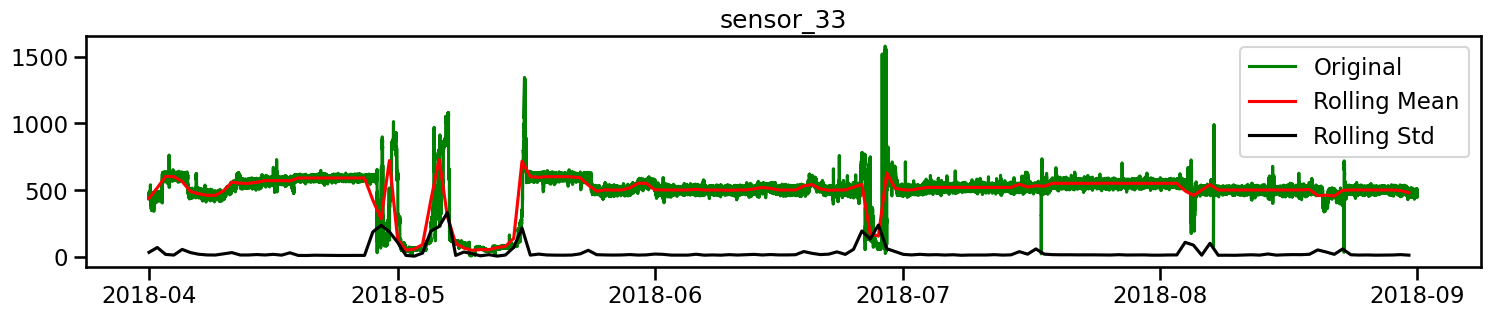

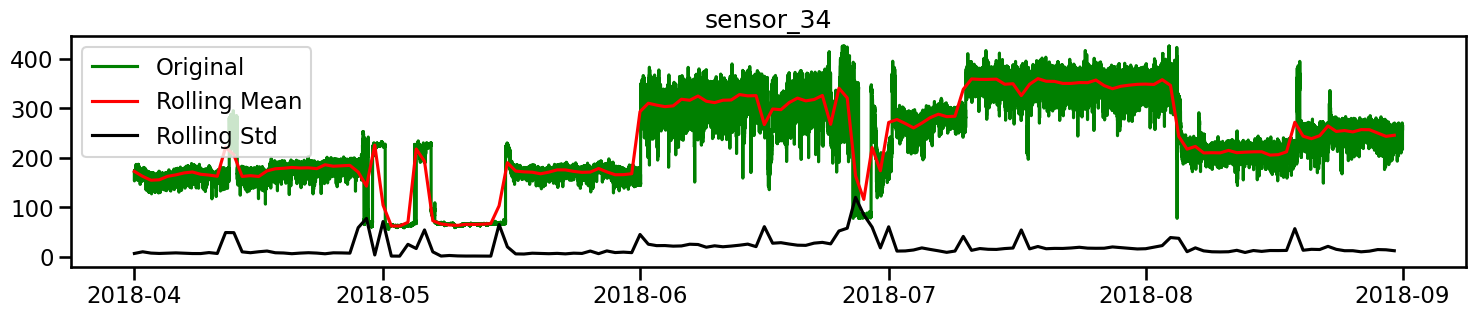

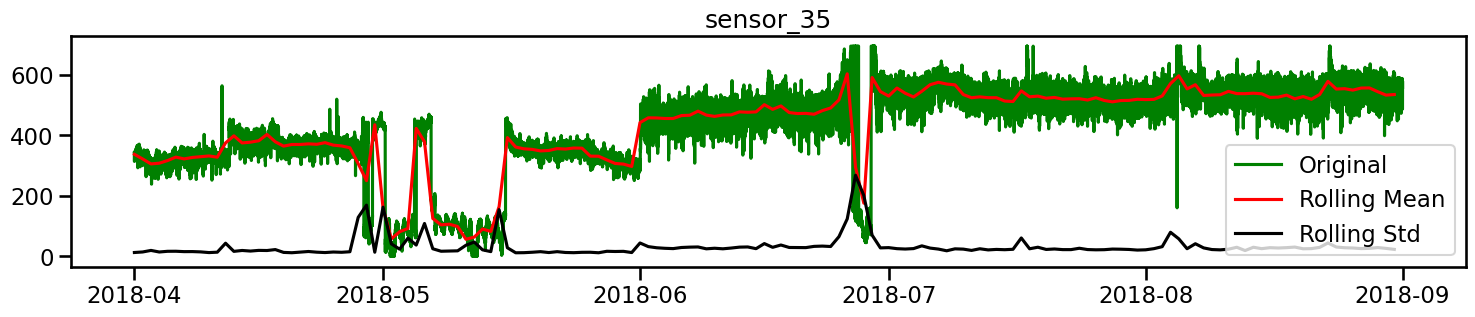

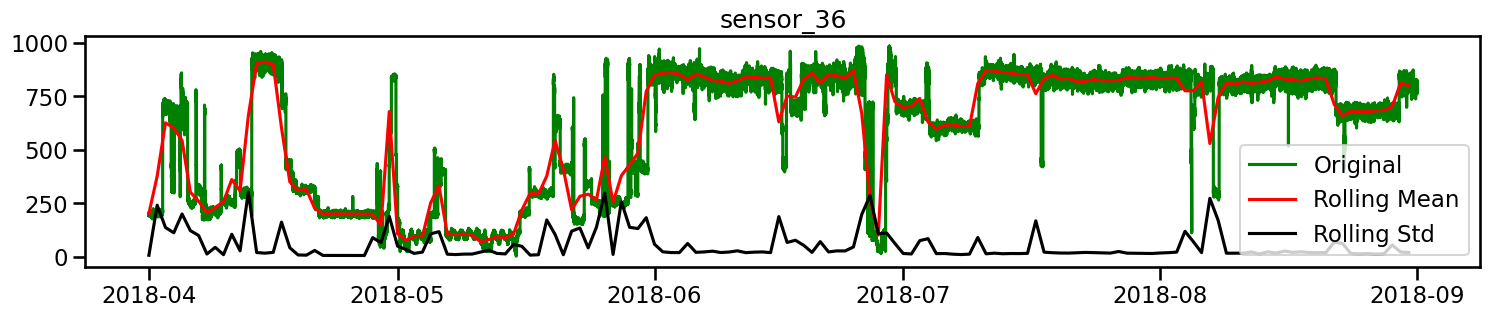

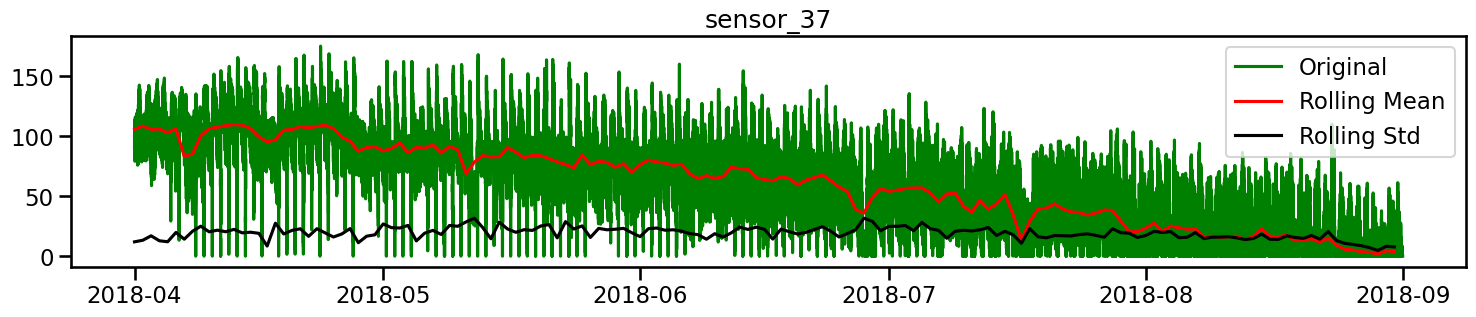

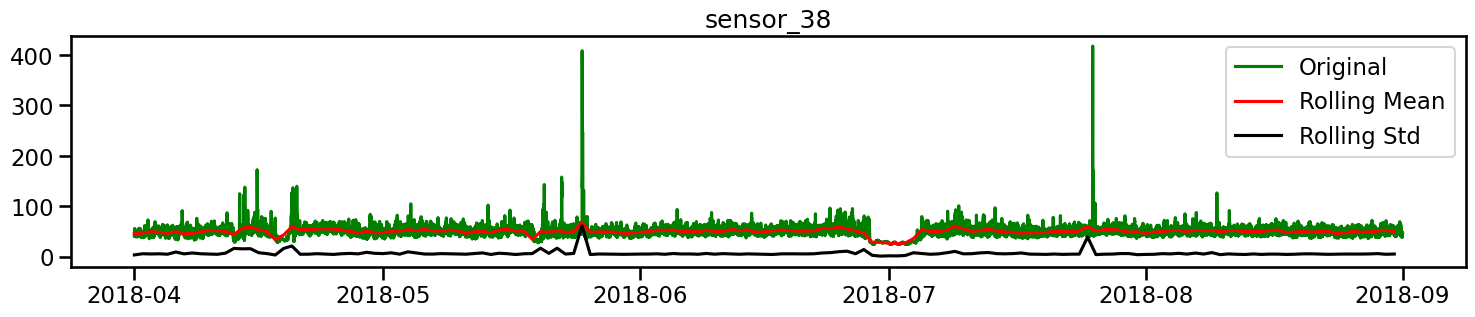

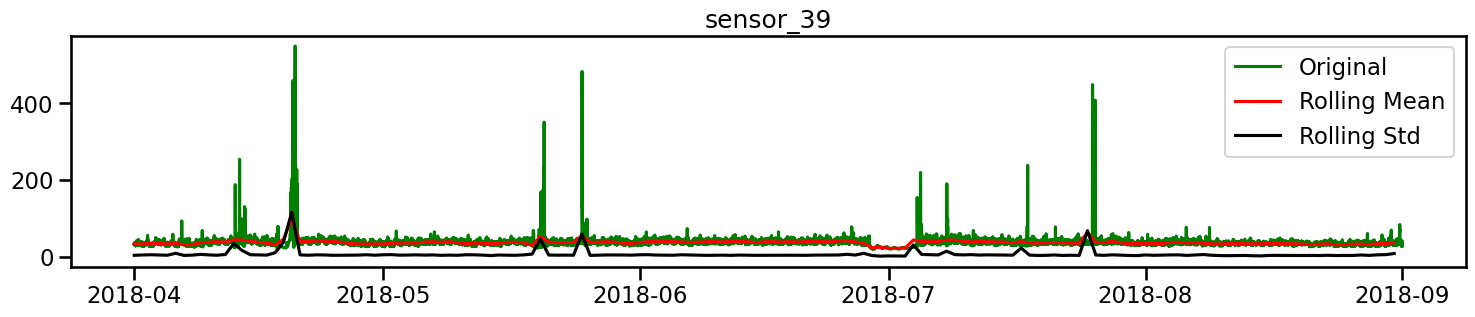

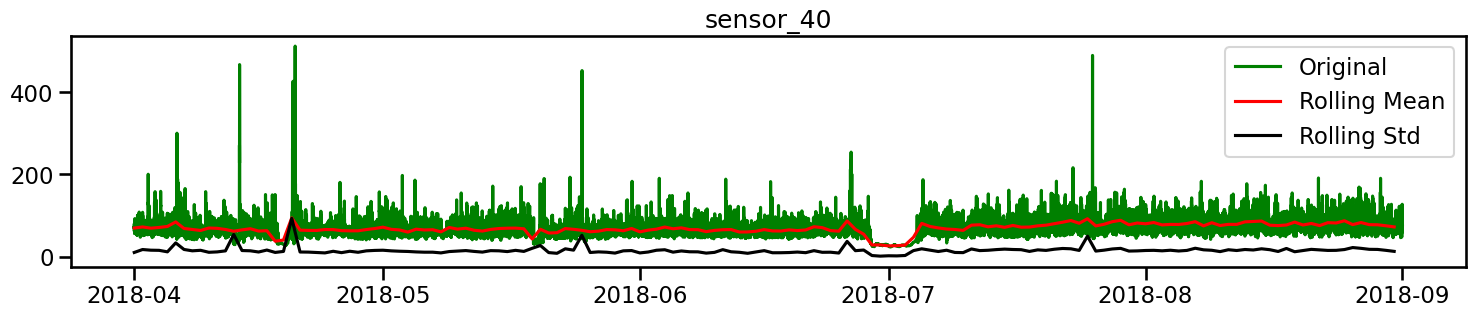

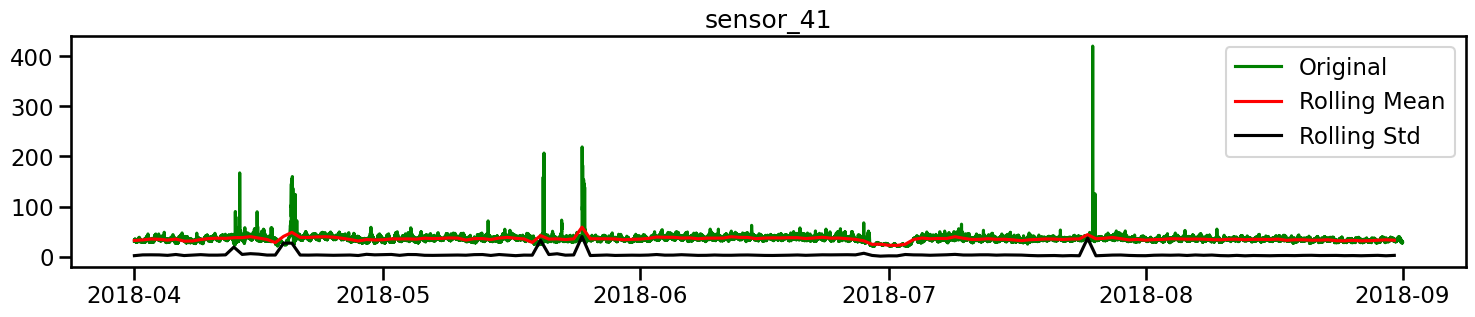

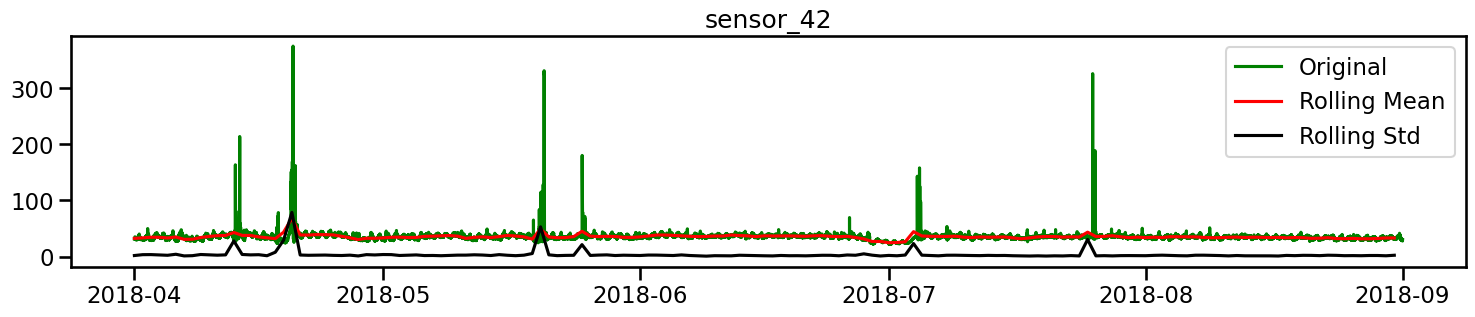

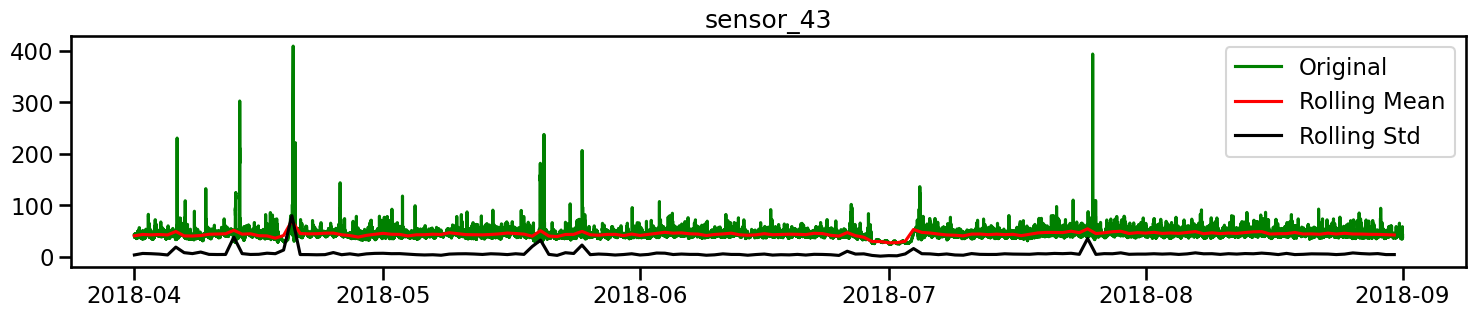

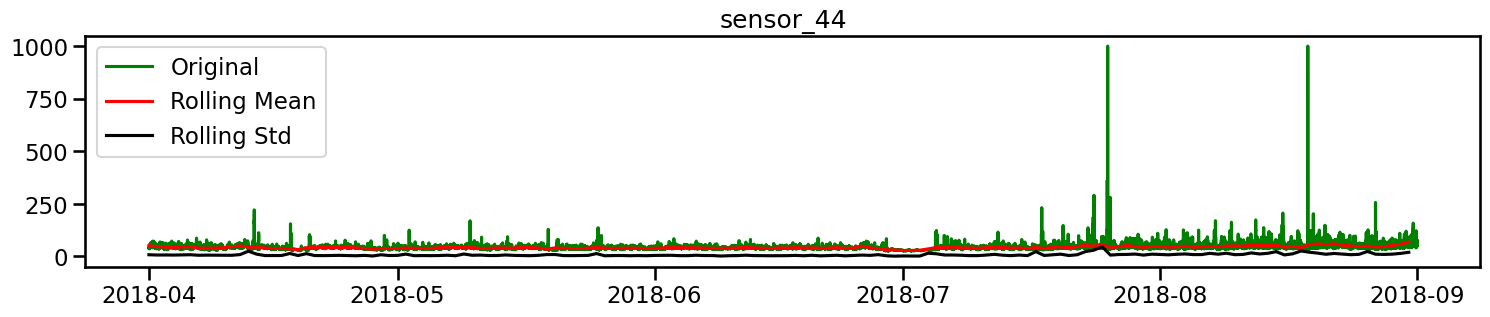

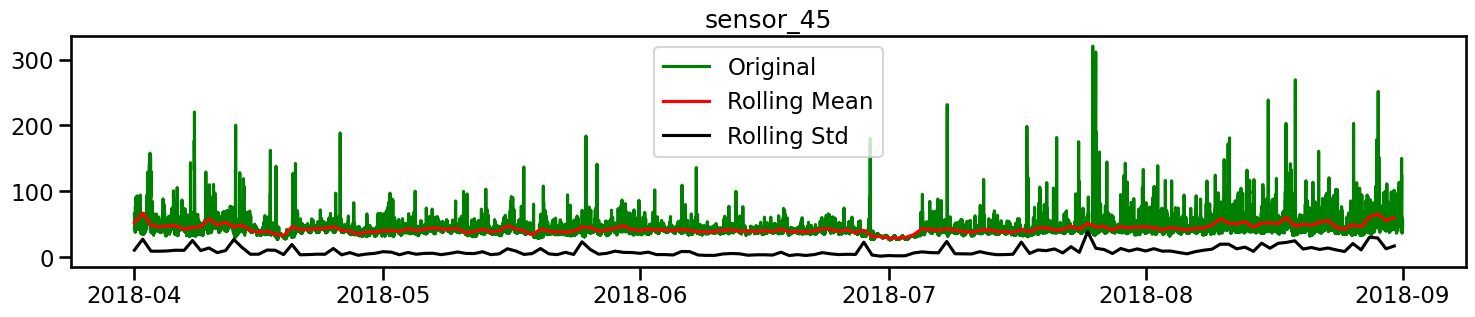

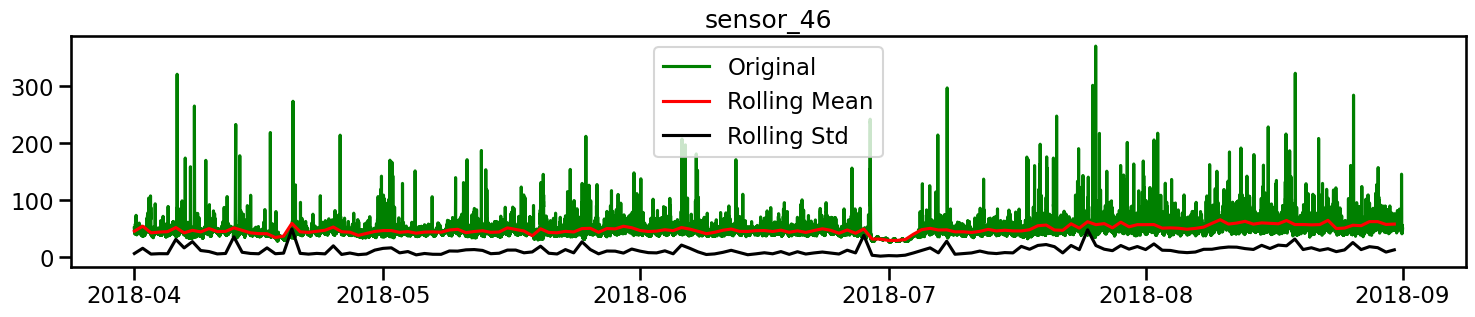

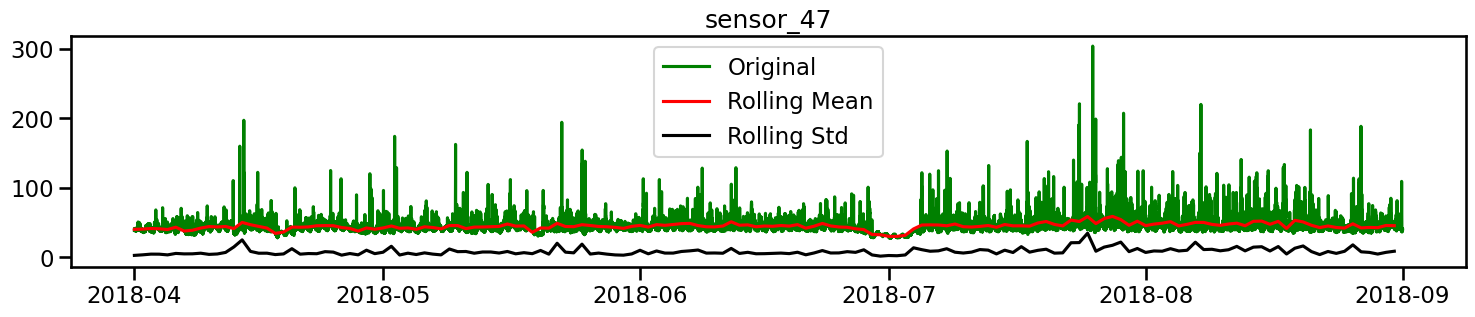

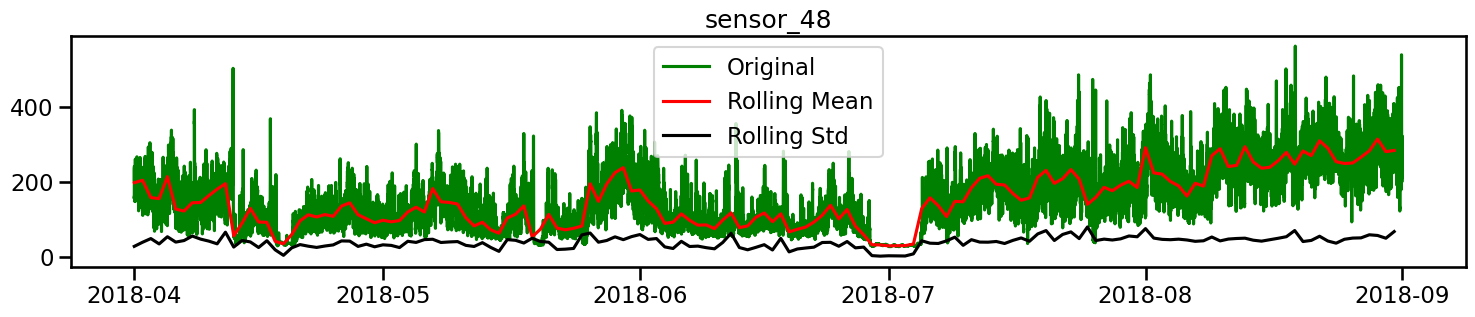

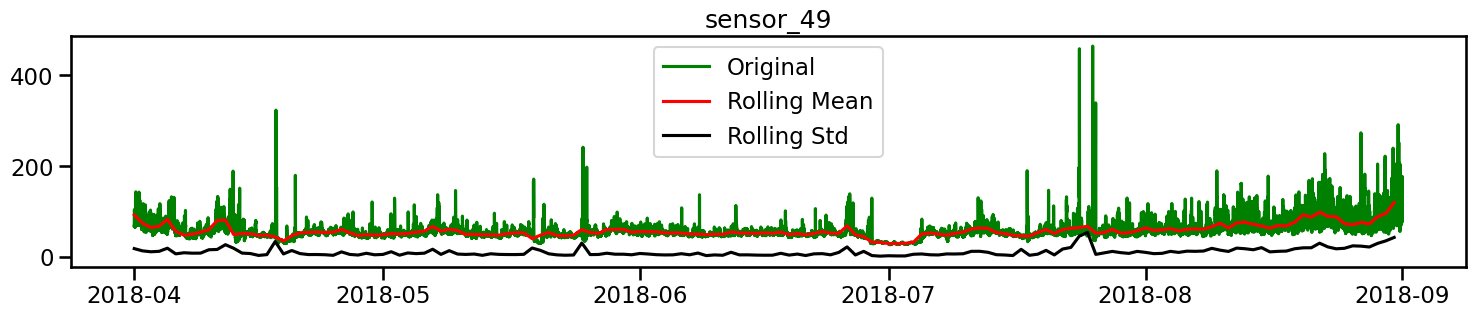

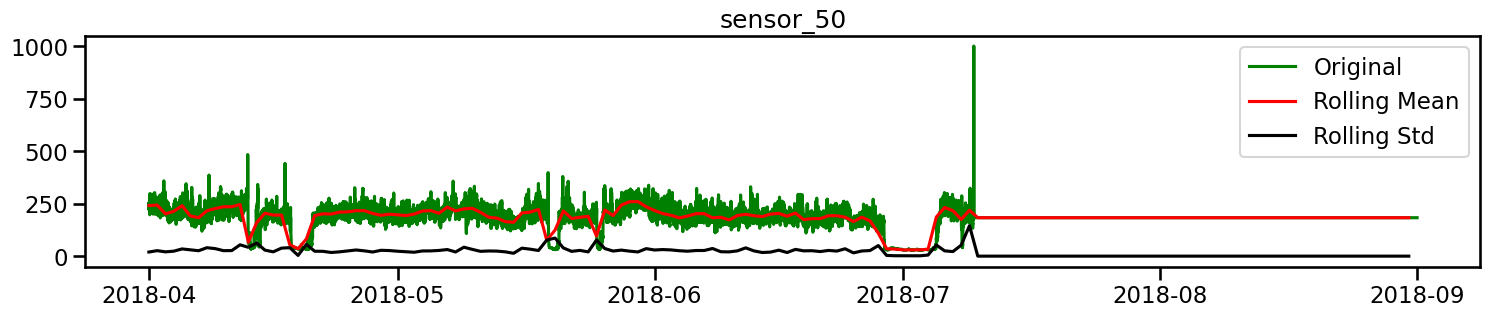

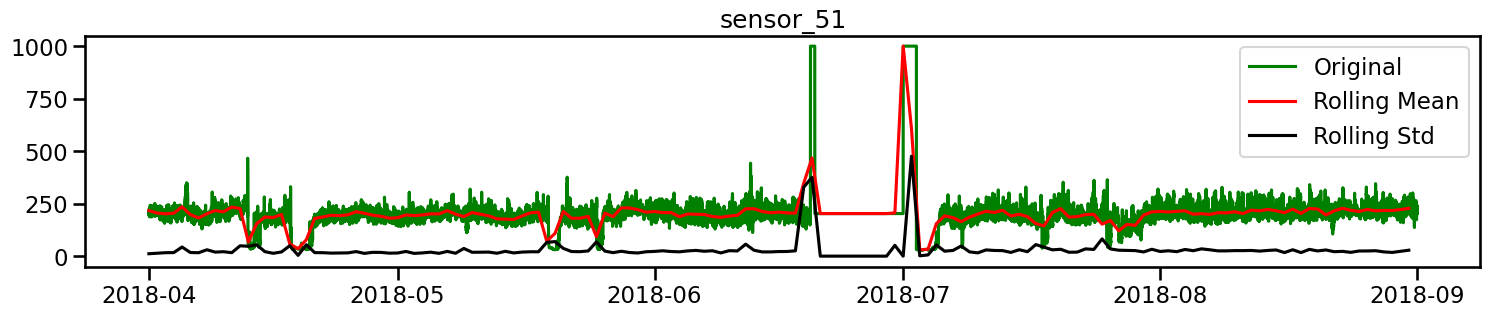

In [20]:
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    plt.figure(figsize=(18,3))
    plt.plot(df[name], color='green', label='Original')
    plt.plot(rollmean[name], color='red', label='Rolling Mean')
    plt.plot(rollstd[name], color='black', label='Rolling Std' )
    plt.legend(loc='best')
    plt.title(name)
    plt.show()

In [21]:
df = df.drop(['machine_status'],axis=1)

## 4. MODEL TRAINING

In [22]:
train_size = int(len(df)*0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(175616, 51) (43905, 51)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train.iloc[:,:51])

train.iloc[:,:51] = scaler.transform(train.iloc[:,:51])
test.iloc[:,:51] = scaler.transform(test.iloc[:,:51])

In [24]:
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i:(i+time_steps)].values)
    return np.array(Xs), np.array(ys)

In [25]:
time_steps=30
X_train, y_train = create_sequences(train.iloc[:,:51],train.iloc[:,:51] , time_steps)
X_test, y_test = create_sequences(test.iloc[:,:51], test.iloc[:,:51], time_steps)
print(X_train.shape)

(175586, 30, 51)


In [26]:
y_train.shape

(175586, 30, 51)

## 5.MODEL SELECTION


#### Justification
- Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) architecture designed to capture long-term dependencies and patterns in sequential data. Time series data, which is a series of data points collected or recorded over time, often exhibits temporal dependencies and patterns that make LSTMs particularly well-suited for this type of data.

In [28]:
timesteps = X_train.shape[1]
num_features = X_train.shape[2]

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

timesteps = 30
num_features = 51

model = Sequential([
    LSTM(128, input_shape=(timesteps, num_features)),
    Dropout(0.2),
    RepeatVector(timesteps),  # replicates features from outputs (30 times)
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    # Time distributed layer to get an output with the right shape
    TimeDistributed(Dense(num_features))
])

model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               92160     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 51)           6579      
 ibuted)                                                

In [30]:
X_train.shape,y_train.shape

((175586, 30, 51), (175586, 30, 51))

In [31]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    callbacks=[es],
    shuffle=False
)

Epoch 1/30
4939/4939 [==============================] - 200s 38ms/step - loss: 0.2664 - val_loss: 0.2738
Epoch 2/30
4939/4939 [==============================] - 193s 39ms/step - loss: 0.2464 - val_loss: 0.2568
Epoch 3/30
4939/4939 [==============================] - 195s 40ms/step - loss: 0.2342 - val_loss: 0.2392
Epoch 4/30
4939/4939 [==============================] - 204s 41ms/step - loss: 0.2218 - val_loss: 0.2280
Epoch 5/30
4939/4939 [==============================] - 208s 42ms/step - loss: 0.2124 - val_loss: 0.2185
Epoch 6/30
4939/4939 [==============================] - 223s 45ms/step - loss: 0.2059 - val_loss: 0.2121
Epoch 7/30
4939/4939 [==============================] - 227s 46ms/step - loss: 0.2007 - val_loss: 0.2070
Epoch 8/30
4939/4939 [==============================] - 236s 48ms/step - loss: 0.1961 - val_loss: 0.2024
Epoch 9/30
4939/4939 [==============================] - 241s 49ms/step - loss: 0.1924 - val_loss: 0.2015
Epoch 10/30
4939/4939 [==============================] 

## 6.ANOMALY DETECTION

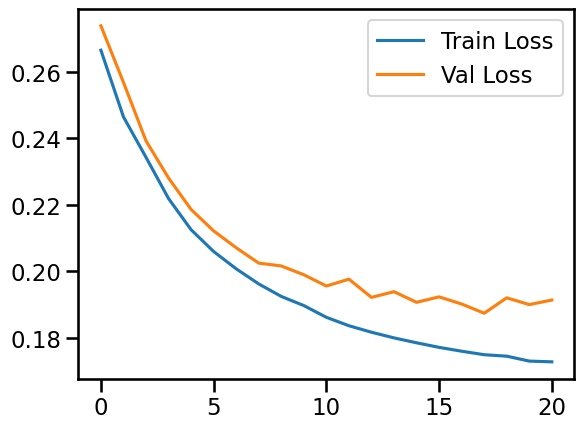

In [32]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()

In [33]:
model.evaluate(X_test, y_test)

1372/1372 [==============================] - 38s 28ms/step - loss: 0.2812


0.2812434136867523

In [34]:
# sns.distplot(train_mae_loss, bins=50, kde=True)

In [35]:
threshold = 0.54

In [36]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

1372/1372 [==============================] - 38s 27ms/step


In [37]:
# values classified as anomalies are the ones that exceed the threshold
test_score_df = pd.DataFrame(test[time_steps:])
test_score_df['loss'] = np.mean(test_mae_loss, axis=1)
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold

In [38]:
test_score_df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
Date                                                                         
2018-08-01 12:42:00   0.226012   0.395189   0.076087   0.771992   0.383176   
2018-08-01 12:43:00   0.230410   0.370296   0.086853   0.771992   0.323561   
2018-08-01 12:44:00   0.230410   0.370296   0.076087   0.771992   0.332285   
2018-08-01 12:45:00   0.226012   0.370296   0.076087   0.771992   0.386085   
2018-08-01 12:46:00   0.230410   0.370296   0.086853   0.771992   0.346825   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
Date                                                                         
2018-08-01 12:42:00   0.005250   0.573919   0.406004   0.052455   0.164161   
2018-08-01 12:43:00   0.057412   0.481492   0.406004   0.052455   0.148455   
2018-08-01 12:44:00   0.126359   0.484682   0.406004   0.036226   0.129609   
2018-08-01 12:45:00   0.186184   0.542047   0.406004   0.052455   0.176723   
2018-08-01 12:46:00   0.103795   0.529300   0.406004   0.036226   0.148455   

                     ...  sensor_45  sensor_46  sensor_47  sensor_48  \
Date                 ...                                               
2018-08-01 12:42:00  ...   2.429319   3.286450   0.450784   4.188075   
2018-08-01 12:43:00  ...   2.270795   3.168081   0.365159   4.091096   
2018-08-01 12:44:00  ...   2.138691   3.089169   0.279536   3.976487   
2018-08-01 12:45:00  ...   2.006588   2.891887   0.222453   3.954446   
2018-08-01 12:46:00  ...   1.874486   2.674878   0.136830   4.002935   

                     sensor_49  sensor_50  sensor_51      loss  threshold  \
Date                                                                        
2018-08-01 12:42:00   1.815905     0.0007   0.389639  0.311208       0.54   
2018-08-01 12:43:00   2.068661     0.0007   0.357604  0.314258       0.54   
2018-08-01 12:44:00   2.224202     0.0007   0.352675  0.315637       0.54   
2018-08-01 12:45:00   2.301973     0.0007   0.382246  0.313917       0.54   
2018-08-01 12:46:00   2.399186     0.0007   0.406888  0.315158       0.54   

                     anomaly  
Date                          
2018-08-01 12:42:00    False  
2018-08-01 12:43:00    False  
2018-08-01 12:44:00    False  
2018-08-01 12:45:00    False  
2018-08-01 12:46:00    False  

[5 rows x 54 columns]

In [39]:
test_score_df['anomaly'].value_counts()

False    42710
True      1165
Name: anomaly, dtype: int64

In [40]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
Date                                                                         
2018-08-04 17:36:00   0.230410   0.556982   0.312970   1.536887   0.352641   
2018-08-04 17:37:00   0.243602   0.556983   0.312969   1.536887   0.324288   
2018-08-04 17:38:00   0.230410   0.556983   0.291434   1.536887   0.379541   
2018-08-04 17:39:00   0.234808   0.556983   0.312969   1.536887   0.341736   
2018-08-04 17:40:00   0.230410   0.556983   0.312970   1.536887   0.336647   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
Date                                                                         
2018-08-04 17:36:00  -0.155670   0.634474   0.204077   0.315364   0.176723   
2018-08-04 17:37:00   0.007392   0.653601   0.222163   0.282905   0.179867   
2018-08-04 17:38:00   0.218483   0.621728   0.189008   0.282905   0.161021   
2018-08-04 17:39:00   0.227942   0.634474   0.219147   0.299134   0.148455   
2018-08-04 17:40:00   0.155689   0.621728   0.204077   0.250446   0.214419   

                     ...  sensor_45  sensor_46  sensor_47  sensor_48  \
Date                 ...                                               
2018-08-04 17:36:00  ...   0.421351   0.800709   1.278479   2.587940   
2018-08-04 17:37:00  ...   0.421351   0.662612   1.135773   2.623203   
2018-08-04 17:38:00  ...   0.421351   0.544243   0.993066   2.711366   
2018-08-04 17:39:00  ...   0.368510   0.445603   0.850360   2.759855   
2018-08-04 17:40:00  ...   0.342089   0.346963   0.736196   2.808343   

                     sensor_49  sensor_50  sensor_51      loss  threshold  \
Date                                                                        
2018-08-04 17:36:00   0.046619     0.0007  -0.125379  0.604111       0.54   
2018-08-04 17:37:00   0.066061     0.0007  -0.140164  0.676139       0.54   
2018-08-04 17:38:00   0.066061     0.0007  -0.150021  0.648314       0.54   
2018-08-04 17:39:00   0.046619     0.0007  -0.157414  0.686273       0.54   
2018-08-04 17:40:00   0.046619     0.0007  -0.184520  0.711178       0.54   

                     anomaly  
Date                          
2018-08-04 17:36:00     True  
2018-08-04 17:37:00     True  
2018-08-04 17:38:00     True  
2018-08-04 17:39:00     True  
2018-08-04 17:40:00     True  

[5 rows x 54 columns]